# Discretized Hamiltonian

We compute here the eigenvalues $\varepsilon_n$ and eigenfunctions $\psi_n(z)$ of an MTI slab which is infinitely extended along the in-plane directions $x$ and $y$ and which has a finite thickness $d$ along the out-of-plane direction $z$.
The three-dimensional MTI Hamiltonian can be decomposed as 
$$
    h_{MTI} = A \partial^2_z + B \partial_z + C \,, 
$$
where the derivative part is 
$$
	A = 
	\begin{bmatrix}
		(B_1-D_1) & 0 & 0 & 0 \\[5pt]
		%
		0 & (B_1-D_1) & 0 & 0 \\[5pt]
		%
		0 & 0 & -(B_1+D_1) & 0 \\[5pt]
		%
		0 & 0 & 0 & -(B_1+D_1)
	\end{bmatrix} \,,
    \qquad
	B = 
	\begin{bmatrix}
		0 & 0 & -i A_1 & 0 \\[5pt]
		%
		0 & 0 & 0 & i A_1  \\[5pt]
		%
		-i A_1 & 0 & 0 & 0 \\[5pt]
		%
		0 & i A_1 & 0 & 0 
	\end{bmatrix} \,,     
$$
and the constant term is given by
$$
    C =  
	\begin{bmatrix}
		\varepsilon_0 + \mu_0 + \Lambda & 0 & 0 & A_2 k_-\\[5pt]
		%
		0 & \varepsilon_0 + \mu_0 - \Lambda & A_2 k_+ & 0 \\[5pt]
		%
		0 & A_2 k_- & \varepsilon_0 - \mu_0 + \Lambda & 0 \\[5pt]
		%
		A_2 k_+ & 0 & 0 & \varepsilon_0 - \mu_0 - \Lambda \\[5pt]
	\end{bmatrix} \,.
$$
In the basis of states $\{ \ket{+,\uparrow}, \ket{+,\downarrow}, \ket{-,\uparrow}, \ket{-,\downarrow} \}$, the three matrices $A,B$ and $C$ can be expressed as
$$
\begin{gathered}
    A = B_1 \lambda_z \sigma_0 - D_1 \lambda_0 \sigma_0 \,, \\[5pt]
    %
    B = -i A_1 \lambda_x \sigma_z \,, \\[5pt]
        %
    C = \epsilon_0 \lambda_0 \sigma_0 + \Lambda \lambda_0 \sigma_z + A_2 \left( k_x \lambda_x  \sigma_x + k_y \lambda_x  \sigma_y \right) + \mu_0 \lambda_z \sigma_0 \,,
\end{gathered}
$$
where $\lambda_{x,y,z}$ and $\sigma_{x,y,z}$ are Pauli matrices acting in the parity and spin subspaces, respectively.

In [1]:
import numpy as np

# Hamiltonian parameters
params=dict(C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6)

# Set of Pauli matrices for spin
sigma0 = np.array([[1, 0], [0, 1]])
sigmaX = np.array([[0, 1], [1, 0]])
sigmaY = np.array([[0, -1j], [1j, 0]])
sigmaZ = np.array([[1, 0], [0, -1]])


# Set of Pauli matrices for pseudo-spin
lambda0 = np.array([[1, 0], [0, 1]])
lambdaX = np.array([[0, 1], [1, 0]])
lambdaY = np.array([[0, -1j], [1j, 0]])
lambdaZ = np.array([[1, 0], [0, -1]])


# Function defining the Matrices A,B,C
def ABCmat(kx, ky, L, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6):

    k = np.sqrt(kx**2+ky**2); e0 = C + D2*k**2; m0 = M - B2*k**2

    #matrix A
    Amat = B1*np.kron(lambdaZ, sigma0) - D1*np.kron(lambda0, sigma0)

    # matrix B
    Bmat = -1j*A1*np.kron(lambdaX, sigmaZ)

    # matrix C
    Cmat = e0*np.kron(lambda0, sigma0) + L*np.kron(lambda0, sigmaZ) + A2*(kx*np.kron(lambdaX, sigmaX) + ky*np.kron(lambdaX, sigmaY)) + m0*np.kron(lambdaZ, sigma0)

    return [Amat,Bmat,Cmat]


# Function building the 3D MTI Hamiltonian from A,B,C
def hMTI(kx, ky, kz, L, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6):

    # build A,B,C matrices
    [Amat, Bmat, Cmat] = ABCmat(kx, ky, L, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2)

    return -np.power(kz,2)*Amat + 1j*kz*Bmat + Cmat

Using the *finite difference approximations*, the spatial derivatives of the wavefunction $\psi \equiv \psi(z)$ can be approximated in the following way

- $ \partial_z f(z) \approx \bigl\lbrack f(z + \Delta z) − f(z − \Delta z) \bigr\rbrack / 2 \Delta z $, 

- $ \partial^2_z f(z) \approx \bigl\lbrack f(z + \Delta z) - 2f(z) + f(z − \Delta z) \bigr\rbrack / \Delta z^2 $,	

and the energy eigenvalue problem $h_{MTI} \psi = E \psi$ becomes
$$
\begin{split}
    h_{MTI} \psi(z) &= \Bigl\lbrack A \partial^2_z + B \partial_z + C \Bigr\rbrack \psi(z) = \\[5pt]
    %
    &= 
    A \frac{1}{\Delta z^2} 
    \Bigl\lbrack \psi(z + \Delta z) - 2\psi(z) + \psi(z − \Delta z) \Bigr\rbrack 
    +
    B \frac{1}{2 \Delta z}
    \Bigl\lbrack \psi(z + \Delta z) - \psi(z − \Delta z) \Bigr\rbrack 
    +
    C \psi(z) = \\[5pt]
    %
    &=
    \Bigl\lbrack \frac{A}{\Delta z^2} + \frac{B}{2 \Delta z} \Bigr\rbrack
    \psi(z + \Delta z)
    +
    \Bigl\lbrack C - \frac{2 A}{\Delta z^2} \Bigr\rbrack
    \psi(z)
    +
    \Bigl\lbrack \frac{A}{\Delta z^2} - \frac{B}{2 \Delta z} \Bigr\rbrack
    \psi(z - \Delta z) 
    =
    E \psi(z) \,.
\end{split}
$$
In the previous equation, we can recognize a tight-binding problem with on-site energy $h_0$ and hopping terms  $h_\pm$ given by 
$$
    h_0 = C - \frac{2 A}{\Delta z^2} \,,
    \qquad
    h_\pm = \frac{A}{\Delta z^2} \pm \frac{B}{2 \Delta z} \,.
$$ 
Given $N+1$ lattice points with spacing $\Delta z$ along the out-of-plane direction $z$ and assuming open boundary conditions at the extremities such that
$$
\begin{equation}
    h_- \psi (0) = 0 \,, \qquad h_+ \, \psi (N \Delta z) = 0 \,,
\end{equation}
$$
we can thus write the following set of equations for the confined based on the previous approximation
$$
\begin{equation}
    \begin{cases}
        h_0 \psi(0) +  h_+ \psi (\Delta y) = E  \psi(0) \,, \\[10pt]
        %
        h_- \psi((n-1)\Delta y) + h_0 \psi (n \Delta y) +  h_+ \psi ((n+1)\Delta y) = E \psi (n \Delta y) \,, \\[10pt]
        %
        h_- \psi ((N-1)\Delta y) + h_0 \psi (N \Delta y)  = E  \psi (N\Delta y) \,.    
    \end{cases}
\end{equation}
$$
Defining a discretized wavefunction on the lattice $$
    \Psi = 
    \begin{bmatrix}
    \psi(0) & \psi(\Delta z) & \dots & \psi(N \Delta z) 
    \end{bmatrix}^T \,,
$$
the energy eigenvalue problem can finally be rewritten as $H \Psi = E \Psi$ where 
$$
    H =
    \begin{bmatrix}
    h_0 & h_+ & 0 & & \dots & 0 \\[5pt]
    %
    h_- & h_0 & h_+ & 0 & \dots & 0 \\[5pt]
    %
    \vdots & & & & & \vdots \\[5pt]
    %
    0 & & & h_- & h_0 & h_+ \\[5pt]
    %
    0 & & & & h_- & h_0
    \end{bmatrix} \,.
$$
To ensure real energy eigenvalues the matrix $H$ must be hermitian: such conditions is satisfied if 
$$
    h_+^\dagger = 
    \frac{A^\dagger}{\Delta z^2} + \frac{B^\dagger}{2 \Delta z} 
    =
    \frac{A}{\Delta z^2} - \frac{B}{2 \Delta z} = h_-  \,,
$$
which means that $A = A^\dagger$ and $B^\dagger = -B$.
It's worth noting that these conditions are always satisfied:
$$
\begin{gathered}
    A^\dagger = B_1^\star \lambda_z \sigma_0 - D_1^\star \lambda_0 \sigma_0 = B_1 \lambda_z \sigma_0 - D_1 \lambda_0 \sigma_0 = A \,, \\[5pt]
    %
    B^\dagger = i A_1^\star \lambda_x \sigma_z = i A_1 \lambda_x \sigma_z = - B \,,
\end{gathered}
$$
which are always satisfied for $A_1, B_1$ and $D_1$ real.

In [2]:
from numpy.linalg import eigh, matrix_rank

from scipy.sparse import bmat
from scipy.linalg import ishermitian


# Build the tigh-binding hamiltonian (Nlat=lattice points, dZ=lattice spacing)
def TBham(Nlat, dZ, kx, ky, L, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6):

    # build A,B,C matrices
    [Amat, Bmat, Cmat] = ABCmat(kx, ky, L, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2)

    # on-site energy
    onsite = Cmat - 2./np.power(dZ,2)*Amat;

    # hopping energy
    hopping_plus = 1./np.power(dZ,2)*Amat + 1./(2.*dZ)*Bmat

    # hopping minus
    hopping_minus = 1./np.power(dZ,2)*Amat - 1./(2.*dZ)*Bmat

    # define a zero tight-binding matrix
    TBmat = [ [None for _ in range(Nlat) ] for _ in range(Nlat)]
		
	# populate the tight-binding matrix
    for i in range(Nlat):
		
        # onsite diagonal energy 
        TBmat[i][i] = onsite
        # hopping energy (n+1)
        if i+1 < Nlat: TBmat[i][i+1] = hopping_plus
        # hopping energy (n-1)
        if i-1 > -1: TBmat[i][i-1] = hopping_minus

    return bmat(TBmat)


# Compute energy and wavefunctions in the MTI slab
def eigenstates(Nlat, dZ, kx, ky, L, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6):

    # thickness 
    d = (Nlat-1)*dZ
    # lattice
    lattice = np.linspace(0., d, num=Nlat)
    
    # build the tight-binding matrix
    tb = TBham(Nlat, dZ, kx, ky, L, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2)

    # solve the tight-binding problem
    if ishermitian(tb.toarray()) is True:
        # print rank of TB matrix
        rank = matrix_rank(tb.toarray()); print(rank, tb.toarray().shape)
        # compute energy spectrum
        egval, egvec = eigh(tb.toarray())
    
    # indices sorted by absolute value
    idx_sort = np.argsort(np.abs(egval)) 
    # reorder egval 
    egval = egval[idx_sort]
    # reorder egvec 
    egvec = [egvec[:, idx] for idx in idx_sort]

    # wavefunctions as spinors
    spinors = np.array([[ egv[4*ilat:4*ilat+4] for ilat in range(Nlat)] for egv in egvec])
    
    # loop over eigenstates 
    for iegv in range(len(egval)):

        # probability density for each lattice point
        pd = np.array([np.vdot(s, s) for s in spinors[iegv]]).real
        # normalization
        norm = np.trapz(pd, x=lattice)
        # normalize spinors over lattice
        spinors[iegv] = np.divide(spinors[iegv], np.sqrt(norm))

    return lattice, egval, spinors



# lattice
Nlat = 250; d = 100.; dZ = d/(Nlat-1)
# eigenstates
lattice, egval, spinors = eigenstates(Nlat=Nlat, dZ=dZ, kx = 0., ky = 0., L = 0.010)

1000 (1000, 1000)


## <font> **Eigenstates and Eigenenergies** </font> 

### <font>Full Wavefunction </font> 


We plot here the probability density $|\psi_n(z)|^2$, where the wavefunction $\psi_n(z)$ is given by the 4-components spinor
$$
\psi_n(z) = 
\begin{pmatrix}
    \psi_{n, \, \uparrow +} (z) &
    \psi_{n, \, \downarrow +} (z) &
    \psi_{n, \, \uparrow -} (z) &
    \psi_{n, \, \downarrow -} (z) 
\end{pmatrix}^T \,,
$$
where $n$ is a discrete quantum number which label the discrete states in the finite system..
The wavefunction is indeed obtained assuming an MTI slab with thickness $d = N_{lat} \, \Delta z$, where $N_{lat}$ is the number of lattice points along the $z$ direction and $\Delta z$ is the spacing between them.
In the following, the wavefunctions are normalized such that 
$$
    \int_0^d dz \, |\psi_n(z)|^2 = 1 \,.
$$

#### <font color='green'> **Eigenvalues** </font> 

Energy eigenvalues: [ 0.01959911  0.01960089  0.03959911  0.03960089  0.26404393  0.27032205
 -0.27043345 -0.27271787 -0.27721132  0.28404393  0.29032205 -0.29043345]



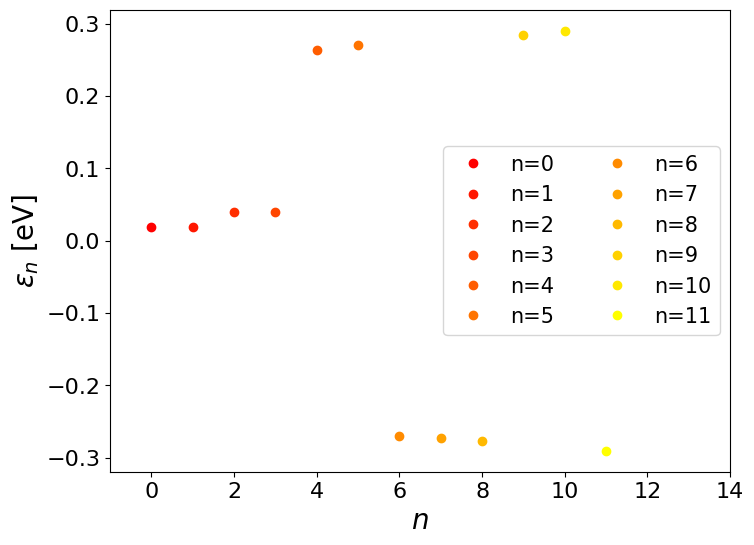

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# eigenvalues to plot
n = 12
# colors
cmap = plt.get_cmap('autumn', n)
# figure
fig, ax = plt.subplots(1,1, figsize=(8, 6))

# energies 
print('Energy eigenvalues: ' + str(egval[0:n]) + '\n')

# loop over eigenvalues
for iegv in range(n):

    # plot energy
    ax.plot(iegv, egval[iegv], 'o', label='n=' + str(iegv), c=cmap(iegv));

ax.legend(fontsize=15, ncol=2, loc='center right')
ax.set_xlim(-1, n+2)
ax.set_xlabel('$n$', fontsize = 20)
ax.set_ylabel('$\epsilon_n$ [eV]', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=16);

#### <font color='green'> **Probability Density** </font> 

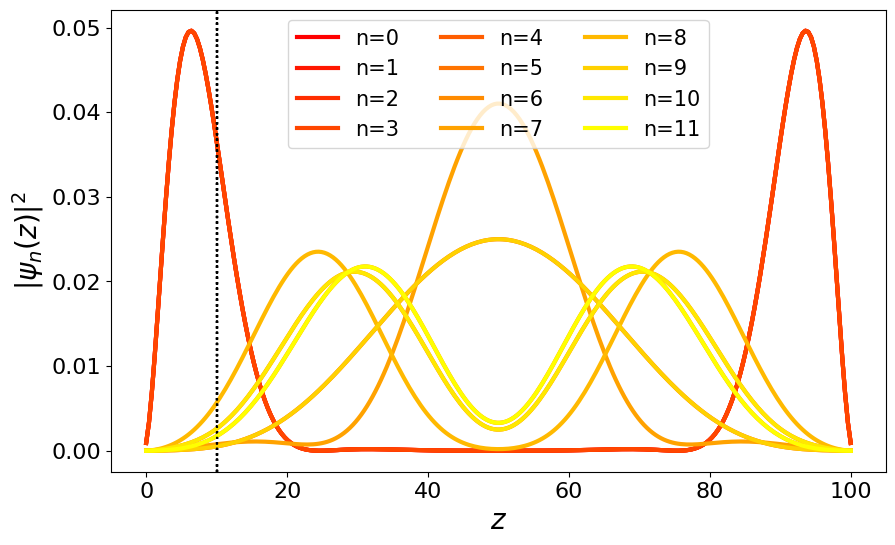

In [4]:
# figure
fig, ax = plt.subplots(1,1, figsize=(10, 6))

# loop over eigenvalues
for iegv in range(n):

    # probability density for each lattice point
    probdens = np.array([np.vdot(s, s) for s in spinors[iegv]]).real

    # plot probability density
    ax.plot(lattice, probdens, label='n=' + str(iegv), lw=3, c=cmap(iegv))

    ax.axvline(x=10, color='black', ls=':')
 
    # normalization
    #print(iegv, np.trapz(probdens, x=lattice))


ax.legend(fontsize=15, loc='upper center', ncol=3)
ax.set_xlabel('$z$', fontsize = 20)
ax.set_ylabel('$|\psi_n(z)|^2$', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=16);

#### <font color='green'> **MTI Components** </font> 

Energy eigenvalues: [0.01959911 0.01960089 0.03959911 0.03960089]



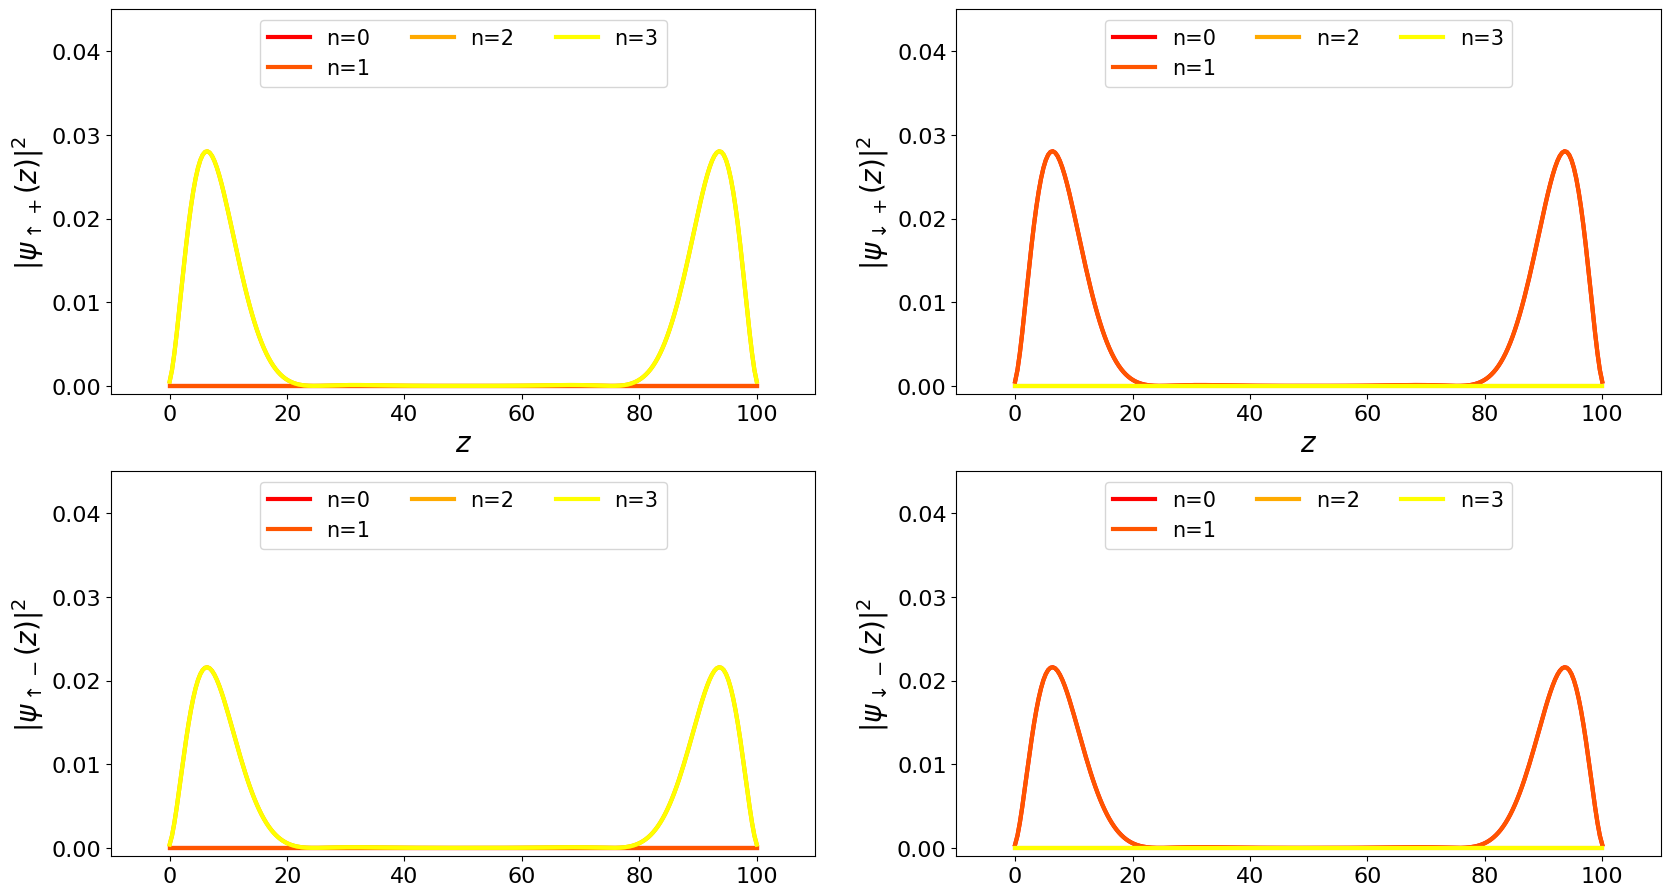

In [5]:
# eigenvalues to plot
n = 4
# colors
cmap = plt.get_cmap('autumn', n)
# figure
fig, ax = plt.subplots(2,2, figsize=(20, 11))

for icomp in range(4):

    if icomp == 0: iPic = 0; jPic = 0
    if icomp == 1: iPic = 0; jPic = 1
    if icomp == 2: iPic = 1; jPic = 0
    if icomp == 3: iPic = 1; jPic = 1
        

    # plot MTI interfaces
    ax[iPic][jPic].axvline(x=lattice[100]-100, ls='--', color='black'); ax[iPic][jPic].axvline(x=lattice[200]-100, ls='--', color='black')

    # loop over eigenstates
    for iegv in range(n):

        # probability density 
        probdens = np.array([[ s[icomp]*np.conjugate(s[icomp]) for icomp in range(4)] for s in spinors[iegv]]).real        
        # plot probability density in MTI
        ax[iPic][jPic].plot(lattice, probdens[:,icomp], label='n=' + str(iegv), lw=3, c=cmap(iegv))

    if iPic == 0: 
        ax[iPic][jPic].set_xlabel('$z$', fontsize = 20)
        
    ax[iPic][jPic].set_xlim(-10., 110.)
    ax[iPic][jPic].set_ylim(-0.001, 0.045)
    ax[iPic][jPic].legend(fontsize=15, loc='upper center', ncol=3)
    ax[iPic][jPic].tick_params(axis='both', which='major', labelsize=16);


ax[0][0].set_ylabel('$|\psi_{\\uparrow +}(z)|^2$', fontsize = 20);
ax[0][1].set_ylabel('$|\psi_{\downarrow +}(z)|^2$', fontsize = 20);
ax[1][0].set_ylabel('$|\psi_{\\uparrow -}(z)|^2$', fontsize = 20);
ax[1][1].set_ylabel('$|\psi_{\downarrow -}(z)|^2$', fontsize = 20);

# energies 
print('Energy eigenvalues: ' + str(egval[0:n]) + '\n')

### <font> Spin-Parity Components </font> 

We plot here the probability density $|\psi_{n, \, \sigma\lambda} (z)|^2$, for each component of the wavefunction $\psi_{n}(z)$ with spin $\sigma=\uparrow,\downarrow$ and parity $\lambda=\pm$.

#### <font color='green'> **Eigenvalues** </font> 

Energy eigenvalues: [0.01959911 0.01960089 0.03959911 0.03960089]



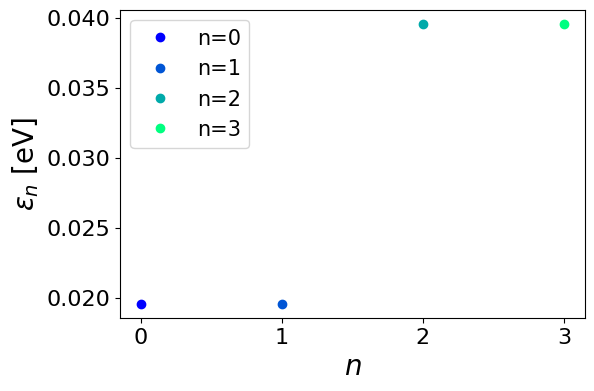

In [6]:
# number of eigenvlaues
n = 4
# colors
cmap = plt.get_cmap('winter', n)

# figure
fig, ax = plt.subplots(1,1, figsize=(6,4))

# energies 
print('Energy eigenvalues: ' + str(egval[0:n])); print()

# loop over eigenvalues
for iegv in range(n):
    ax.plot(iegv, egval[iegv], 'o', label='n=' + str(iegv), c=cmap(iegv))

ax.legend(fontsize=15)

ax.set_xlabel('$n$', fontsize = 20)
ax.set_ylabel('$\epsilon_n$ [eV]', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=16);

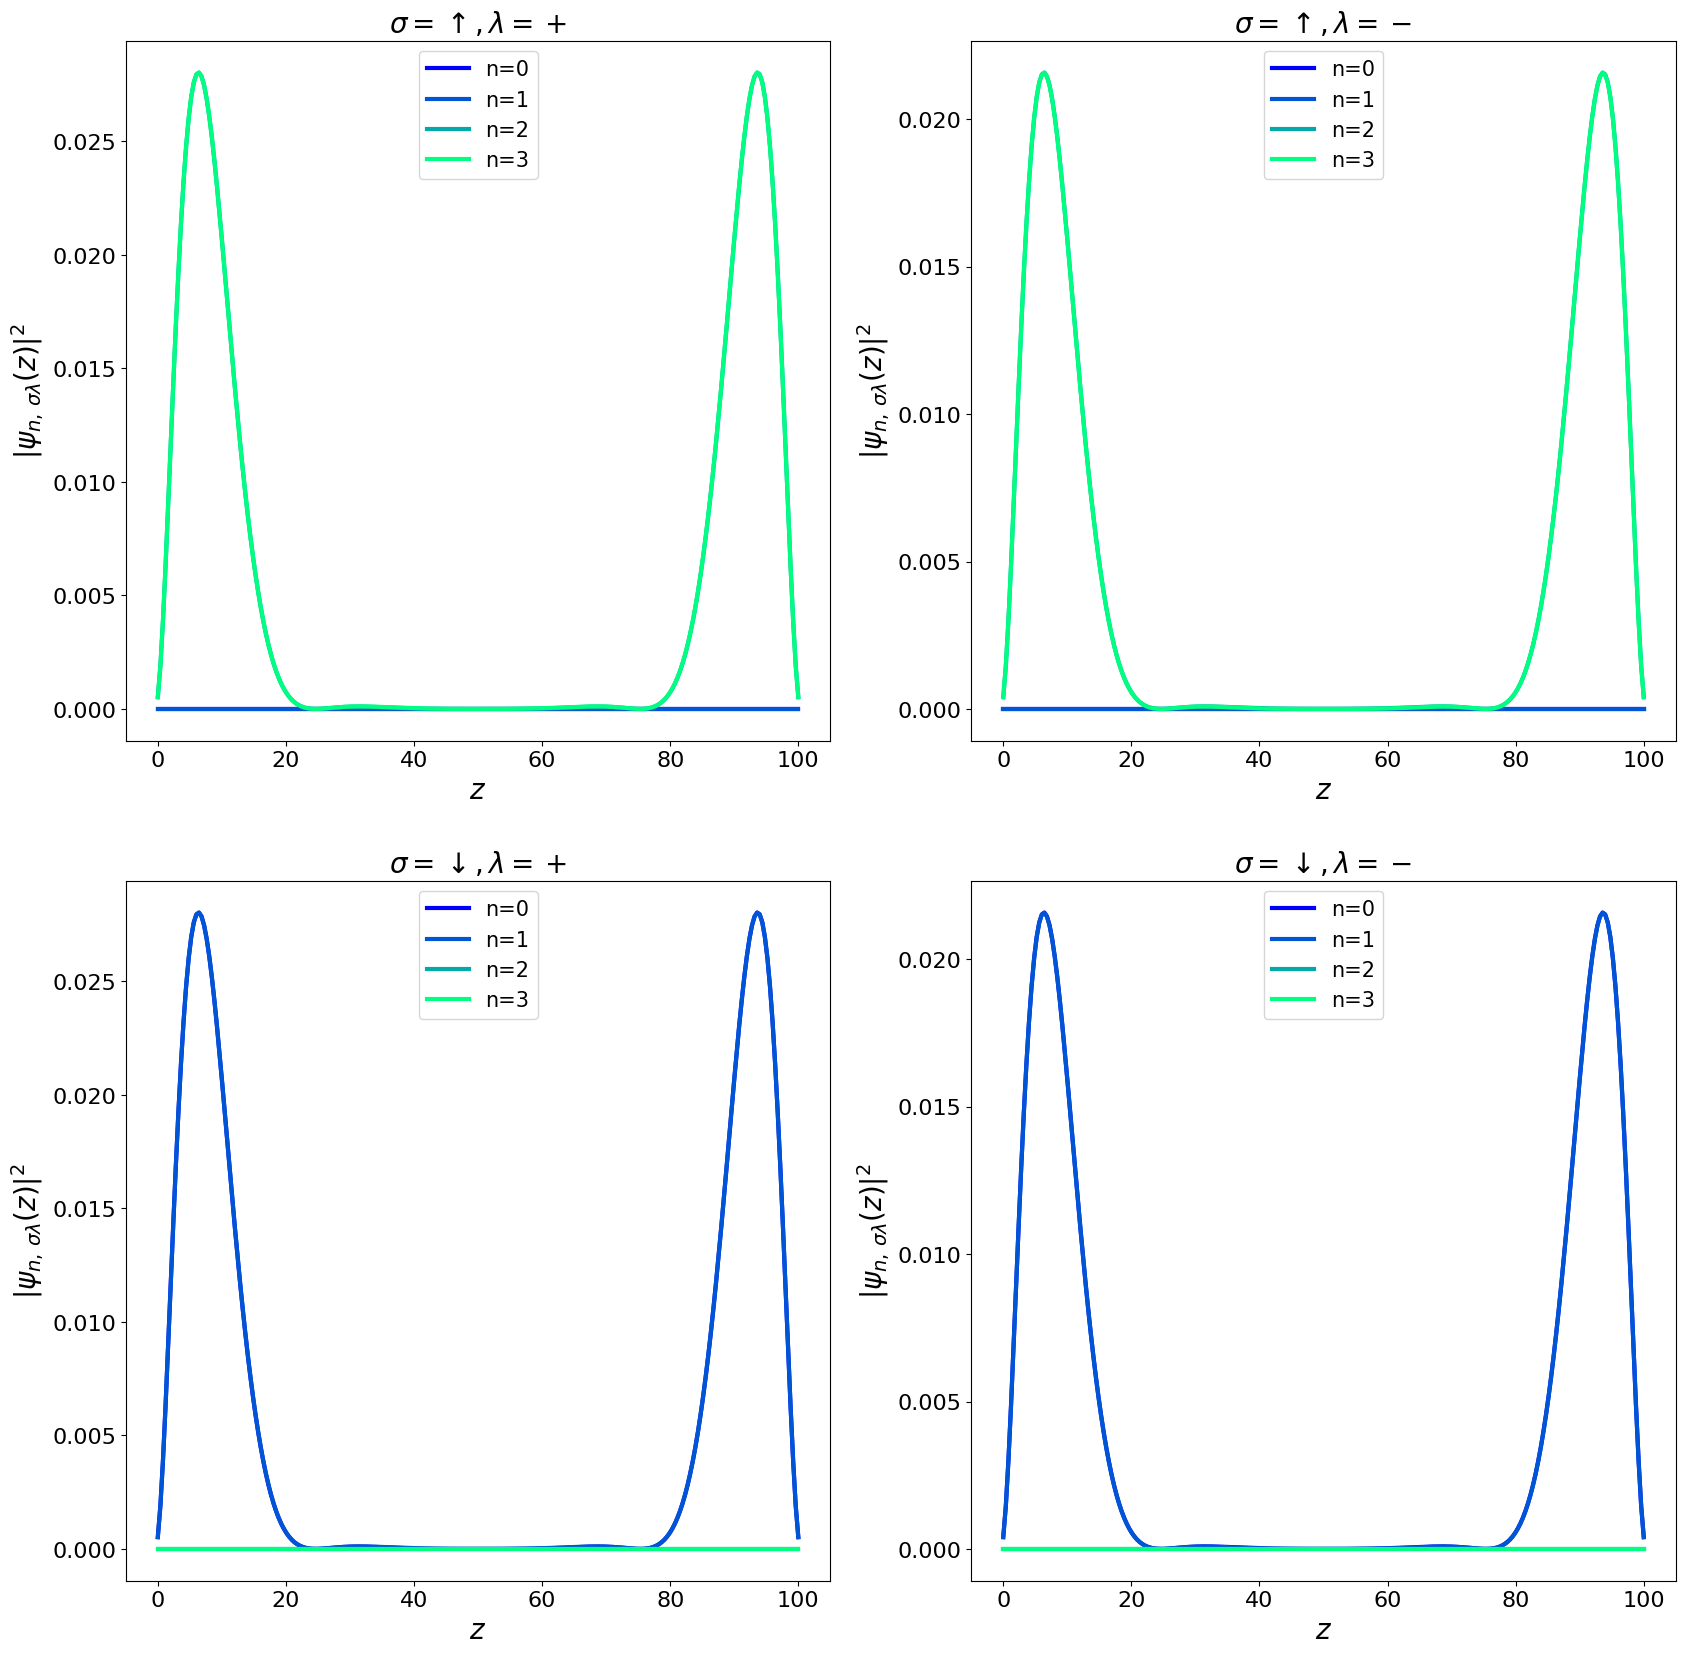

In [7]:
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# loop over eigenvalues
for iegv in range(4):

    # probability density 
    probdens = np.array([[ s[icomp]*np.conjugate(s[icomp]) for icomp in range(4)] for s in spinors[iegv]]).real
    
    # loop over wavefunctions components
    for icomp in range(4):

        # spin up components
        if icomp==0: iPic = 0; jPic = 0; axs[iPic][jPic].set_title('$\sigma=\\uparrow, \lambda=+$', fontsize = 20)
        if icomp==2: iPic = 0; jPic = 1; axs[iPic][jPic].set_title('$\sigma=\\uparrow, \lambda=-$', fontsize = 20)
        # spin down components  
        if icomp==1: iPic = 1; jPic = 0; axs[iPic][jPic].set_title('$\sigma=\downarrow, \lambda=+$', fontsize = 20)
        if icomp==3: iPic = 1; jPic = 1; axs[iPic][jPic].set_title('$\sigma=\downarrow, \lambda=-$', fontsize = 20)
        
        axs[iPic][jPic].plot(lattice, probdens[:,icomp], label='n=' + str(iegv), lw=3, c=cmap(iegv))
        
        # normalization
        #print(np.trapz(probdens[:,icomp]))

        axs[iPic][jPic].legend(fontsize=15)
        axs[iPic][jPic].set_xlabel('$z$', fontsize = 20)
        axs[iPic][jPic].set_ylabel('$|\psi_{n, \, \sigma \lambda}(z)|^2$', fontsize = 20)
        axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=16);

### <font> Completeness </font> 

Below, we check that the states $\psi_{n, \, \sigma\lambda}(z)$ satisfies the *completeness relation*.
Recalling that $\psi_{n, \, \sigma\lambda}(z) = \braket{ z \sigma \lambda | n }$ we can write explicitly
$$
    \braket{ z \sigma \lambda | z' \sigma' \lambda' }
    =
    \sum_{n} \braket{ z \sigma \lambda | n } \braket{ n | z' \sigma' \lambda' }
    =
    \sum_{n} \psi_{n, \, \sigma \lambda}(z) \psi^\star_{n, \, \sigma' \lambda'}(z')
    =
    \delta_{\sigma \sigma'} \delta_{\lambda \lambda'} \delta(z-z') \,.
$$

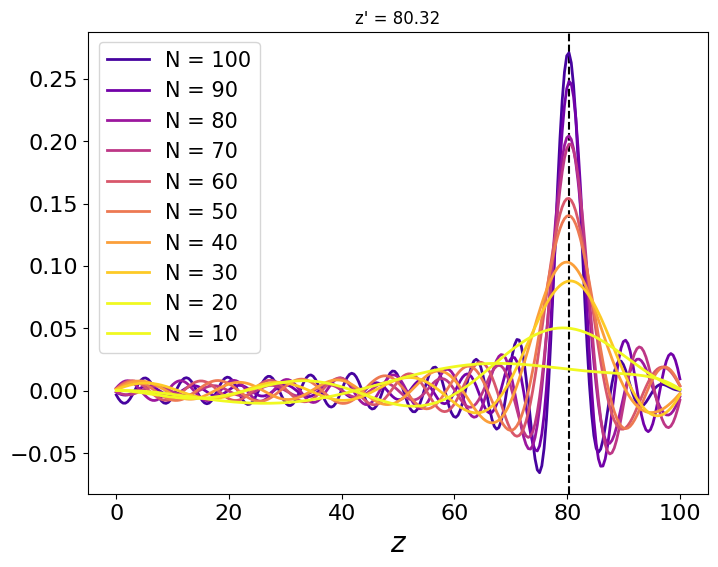

In [8]:
# iterations on eigenstates
N = np.arange(start=10, stop=101, step=10)

# figure
fig, ax = plt.subplots(1,1, figsize=(8,6))
# colors
cmap = plt.get_cmap('plasma', len(N))
# titles
title = ['$\sigma=\\uparrow, \lambda=+$', '$\sigma=\downarrow, \lambda=+$', '$\sigma=\\uparrow, \lambda=-$','$\sigma=\downarrow, \lambda=-$']

# z' position (between 0 and Nlat)
X = 200; ax.axvline(x=lattice[X], c='black', ls='dashed')

# spin lambda components
icomp = 1; jcomp = 1;

# loop over states
for idx in range(1,len(N)+1):

    # number of states
    Negv = N[-idx]
    # compute psi(x).psi^\star (x')
    delta = np.array([ np.sum([ spinors[iegv][x][icomp]*np.conj(spinors[iegv][X][jcomp]) for iegv in range(Negv)]) for x in range(Nlat) ])
    
    # plot the function on lattice
    ax.plot(lattice, delta.real, lw=2, c=cmap(idx), label='N = ' + str(Negv))

ax.set_title('z\' = ' + str(round(lattice[X],2)))
ax.legend(fontsize=15)
ax.set_xlabel('$z$', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=16);

### <font> Orthonormality </font> 

Similarly, we can check that the energy states $\ket{n}$ are *orthonormal*, meaning that
$$
    \braket{ n | n'} = \sum_{\sigma\lambda} \int dz \, 
    \psi_{n, \, \sigma\lambda}^\star(z) \psi_{n', \, \sigma\lambda}(z)
    =
    \delta_{nn'}\,,
$$

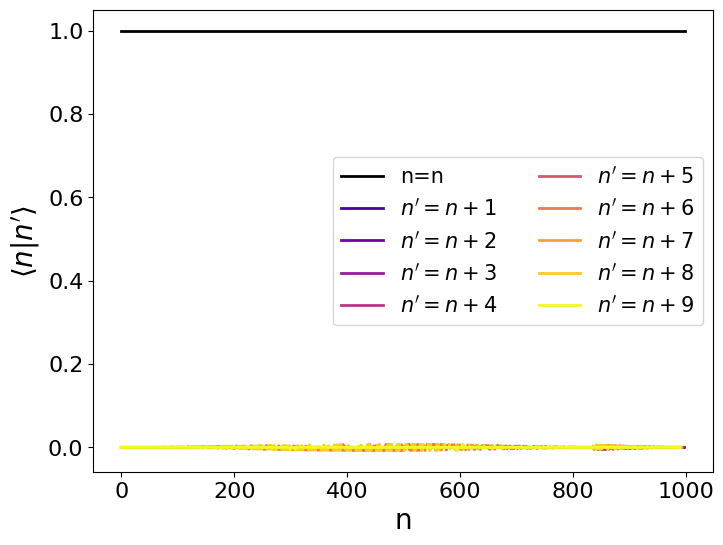

In [9]:
# iteration
N = 10

# figure
fig, ax = plt.subplots(1,1, figsize=(8,6))
# colors
cmap = plt.get_cmap('plasma', N)

# diagonal product
deltann = np.array([ np.trapz( [np.vdot(s[iLat], s[iLat]) for iLat in range(Nlat)], x=lattice ) for s in spinors])
# plot diagonal product
ax.plot( np.arange(len(egval)), deltann.real, label='n=n', lw=2, c='black')

for idx in range(1,N,1):

    # off-diagonal product
    deltanm = np.array([ np.trapz( [np.vdot(spinors[iegv][iLat], spinors[iegv+idx][iLat]) for iLat in range(Nlat)], x=lattice ) for iegv in range(len(egval)-idx)])
    
    # label
    label = '$n\'=n + $' + str(idx) 
    # plot off-diagonal product
    ax.plot( np.arange(len(egval)-idx), deltanm.real, label=label, lw=2, c=cmap(idx))


ax.set_xlabel('n', fontsize = 20)
ax.set_ylabel('$\langle n | n\' \\rangle$', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.legend(fontsize=15, ncol=2);

### <font> Convergence  </font> 
We investigate here the convergence of the wavefunctions $\psi_n(z)$ for an increasing number of lattice sites.

100 (100, 100)
25 0.2736663451166251
200 (200, 200)
50 0.2738924245072416
300 (300, 300)
75 0.2739597056199287
400 (400, 400)
100 0.2739912502216768
500 (500, 500)
125 0.2740094247111459
600 (600, 600)
150 0.27402120801853735
700 (700, 700)
175 0.27402945526865785
800 (800, 800)
200 0.2740355456291044


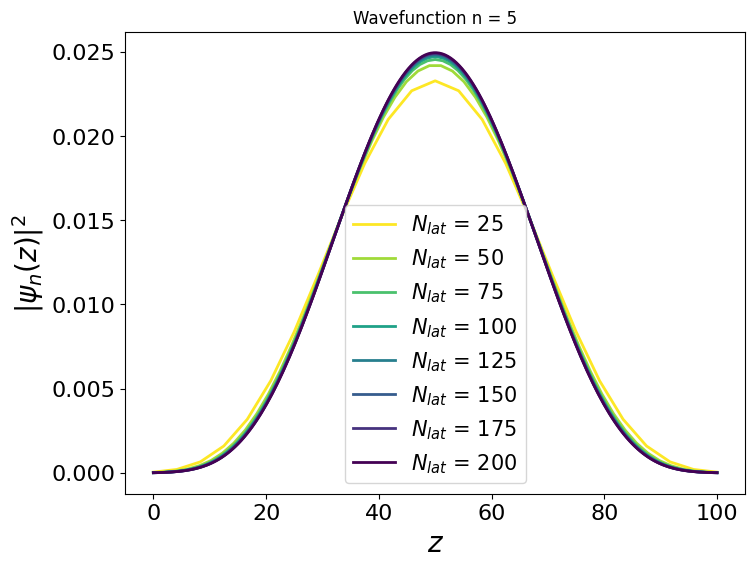

In [10]:
# state index
n = 5
# lattice
Nlat = np.arange(25,201,25); d = 100.; dZ = [d/(n-1) for n in Nlat]

# figure
fig, ax = plt.subplots(1,1, figsize=(8,6))
# colors
cmap = plt.get_cmap('viridis_r', len(Nlat))

 
# loop over lattices
for iNlat in range(len(Nlat)):
      
    # total number of states
    Ntot = 4*Nlat[iNlat]
        
    # eigenstates
    lattice, egval, spinors = eigenstates(Nlat=Nlat[iNlat], dZ=dZ[iNlat], kx=0., ky=0., L=0.)
   
    # probability density for each lattice point
    probdens = np.array([np.dot(np.conjugate(s), s) for s in spinors[n]]).real

    print(Nlat[iNlat], egval[n])
    
    # label
    label = '$N_{lat}$ = ' + str(Nlat[iNlat])   
    # plot the probability density
    ax.plot( lattice, probdens, label=label, lw=2, c=cmap(iNlat))


ax.set_title('Wavefunction n = ' + str(n))
ax.set_xlabel('$z$', fontsize = 20)
ax.set_ylabel('$|\psi_n(z)|^2$', fontsize = 20)

ax.legend(fontsize=15, ncol=1)
ax.tick_params(axis='both', which='major', labelsize=16);

### <font> **Green's Function** </font> 

The goal here is to compute the time-ordered (in real time) Green's function $\mathcal{G}^{(0)}_{MTI}$ using the wavefunctions $\psi_{n, \, \sigma\lambda}$ previously obtained by discretizing the 3D MTI Hamiltonian $h_{MTI}$ on a finite lattice along the $z$ direction.
In an MTI slab with a finite thickness $d$ along $z$ and translational invariance along $x$ and $y$, the real-time Green's function is given by
$$
    \newcommand{\T}{\hat{T}_t \,}
	\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') =
	-i \left\langle
	\T \hat{\psi}_{\sigma \lambda}(zt) \hat{\psi}^\dagger_{\sigma' \lambda'}(z't')
	\right\rangle_0 \,,
$$
where $\hat{\psi}^\dagger_{\sigma \lambda}(zt)$ $(\hat{\psi}_{\sigma \lambda}(zt))$ creates (annihilates) an electron with spin $\sigma$ and parity $\lambda$ at position $z$ and time $t$.
Here, $\langle \dots \rangle_0$ indicates that the average is on the unperturbed ground state.
For the sake of clarity, we omitted the indices for the in-plane wavenumbers $k_x$ and $k_y$.
Writing explicitly the time-evolution in the Heisenberg picture, the field operators can be expanded in terms of the wavefunctions $\psi_{n, \, \sigma\lambda}$ as
$$
    \hat{\psi}_{\sigma \lambda}(zt) = 
    \sum_{n=0}^{+\infty} e^{-i \epsilon_n t /\hbar} \psi_{n, \, \sigma\lambda}(z) \hat{c}_{n} \,,
    \qquad
    \hat{\psi}^\dagger_{\sigma \lambda}(zt) = 
    \sum_{n=0}^{+\infty} e^{i \epsilon_n t/\hbar} \psi_{n, \, \sigma\lambda}^\star(z) \hat{c}^\dagger_{n} \,,
$$
where $\hat{c}^\dagger_{n}$ $(\hat{c}_{n})$ is the creation (annihilation) operator for an electron in the quantum state $\ket{n}$.
Making explicit the action of the time-ordering operator, the Green's function takes the following form
$$
    \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') =
	-i \theta(t-t') \left\langle  \hat{\psi}_{\sigma \lambda}(zt) \hat{\psi}^\dagger_{\sigma' \lambda'}(z't') \right\rangle_0
     +
     i \theta(t'-t) \left\langle \hat{\psi}^\dagger_{\sigma' \lambda'}(z't') \hat{\psi}_{\sigma \lambda}(zt) \right\rangle_0 \,.
$$
The first term in the previous equation can be rewritten as
$$
\begin{split}
    \left\langle \hat{\psi}_{\sigma \lambda}(zt) \hat{\psi}^\dagger_{\sigma' \lambda'}(z't') \right\rangle_0
    &=
    \sum_{n m} 
    e^{-i \left( \epsilon_n t - \epsilon_{m} t' \right)/\hbar } 
    \psi_{n, \, \sigma\lambda}(z) \psi_{m, \, \sigma'\lambda'}^\star(z') 
    \left\langle \hat{c}_{n} \hat{c}^\dagger_{m} \right\rangle_0 = \\[5pt]
    %%%
    &=
    \sum_{n m} 
    e^{-i \left( \epsilon_n t - \epsilon_{m} t' \right)/\hbar } 
    \psi_{n, \, \sigma\lambda}(z) \psi_{m, \, \sigma'\lambda'}^\star(z') 
    \left\langle 
        \delta_{nm} -
        \hat{c}^\dagger_{m} \hat{c}_{n} 
    \right\rangle_0 = \\[5pt]
    %%%
    &=
    \sum_{n m} \delta_{nm}
    e^{-i \left( \epsilon_n t - \epsilon_{m} t' \right)/\hbar } 
    \psi_{n, \, \sigma\lambda}(z) \psi_{m, \, \sigma'\lambda'}^\star(z') 
    \left\langle 
        1 -
        \hat{c}^\dagger_{n} \hat{c}_{n} 
    \right\rangle_0 = \\[5pt]
    %%%
    &= \sum_{n} 
    e^{-i \epsilon_n \left( t-t' \right)/\hbar } 
    \psi_{n, \, \sigma\lambda}(z) \psi_{n, \, \sigma'\lambda'}^\star(z') 
    \left\langle 
        1 -
        \hat{n}_{n}
    \right\rangle_0 \,,
\end{split}
$$
where in the third row we observed that the average in the unperturbed ground state is nonzero only if the operators $\hat{c}_{n}$ and $\hat{c}^\dagger_{m}$ act on the same quantum state, i.e.
$$
    \left\langle \delta_{nm} - \hat{c}^\dagger_{m} \hat{c}_{n} \right\rangle_0 
    =
    \delta_{nm}  \left\langle 1 - \hat{c}^\dagger_{n} \hat{c}_{n} \right\rangle_0 \,.
$$
Similarly, the second term in the Green's function expansion can be expressed as
$$
    \left\langle  \hat{\psi}^\dagger_{\sigma' \lambda'}(z't') \hat{\psi}_{\sigma \lambda}(zt) \right\rangle_0
    = \sum_{n} 
    e^{-i \epsilon_n \left( t-t' \right)/\hbar } 
    \psi_{n, \, \sigma\lambda}(z) \psi_{n, \, \sigma'\lambda'}^\star(z') 
    \left\langle 
        \hat{n}_{n}
    \right\rangle_0 \,.
$$
Here, $\hat{n}_{n} \equiv \hat{c}^\dagger_{n} \hat{c}_{n}$ is the number operator which counts the number of electrons in the state $\ket{n}$.
For non-interacting fermions its average value is given by the Fermi-Dirac distribution
$$
    \left\langle \hat{n}_{n} \right\rangle_0
    =
    \frac{1}{e^{\beta(\epsilon_n-E_F)} + 1} \,,
$$
where $\beta = 1/k_B T$ is the inverse temperature.
In the zero temperature limit we can thus write $\left\langle \hat{n}_{n} \right\rangle_0 = \theta(E_F-\epsilon_n)$ and $\left\langle 1-\hat{n}_{n} \right\rangle_0 = \theta(\epsilon_n-E_F)$.
With such expansions, the real-time Green's function can be expressed in terms of the wavefunctions $\psi_{n, \, \sigma\lambda}(zt)$ as 
$$
\begin{split}
    \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') 
    &=
	-i \theta(t-t') \left\langle  \hat{\psi}_{\sigma \lambda}(zt) \hat{\psi}^\dagger_{\sigma' \lambda'}(z't') \right\rangle_0
     +
     i \theta(t'-t) \left\langle \hat{\psi}^\dagger_{\sigma' \lambda'}(z't') \hat{\psi}_{\sigma \lambda}(zt) \right\rangle_0 = \\[5pt]
     %%%
     &=
     \sum_{n} 
    e^{-i \epsilon_n \left( t-t' \right)/\hbar } 
    \psi_{n, \, \sigma\lambda}(z) \psi_{n, \, \sigma'\lambda'}^\star(z')
    \Bigl\lbrack
    -i \theta(t-t') \left\langle 1-\hat{n}_{n} \right\rangle_0
    +
    i \theta(t'-t) \left\langle \hat{n}_{n} \right\rangle_0
    \Bigr\rbrack \,.
\end{split}
$$

#### **Angular Green's Function** </font> 


The corresponding expression for the angular Green's function in frequency space can be obtained through the following Fourier transform 
$$
    \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; t-t') 
    =
    \frac{1}{2\pi} \int d\omega \,
    e^{-i \omega(t-t')} \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega) \,.
$$
Using the following identity
$$
    -i\theta(t-t') e^{-Et} = \lim_{\eta \rightarrow 0^+} \frac{1}{2\pi} \int d\omega \,
    \frac{e^{-i \omega(t-t')}}{\omega-E+i\eta} \,,
$$
it is possible to rewrite the first term in the previous expansion as
$$
     -i \theta(t-t') e^{-i \epsilon_n \left( t-t' \right)/\hbar }
    =
    \lim_{\eta \rightarrow 0^+} \frac{1}{2\pi} \int d\omega \,
    \frac{e^{-i \omega(t-t')}}{\omega - \epsilon_n/\hbar + i\eta} \,,
$$
while the second one becomes
$$
    i \theta(t'-t) e^{-i \epsilon_n \left( t-t' \right)/\hbar }
    =
    - \lim_{\eta \rightarrow 0^+} \frac{1}{2\pi} \int d\omega \,
    \frac{e^{-i \omega(t'-t)}}{\omega + \epsilon_n/\hbar + i\eta} \,.
$$
Plugging these expressions in the previous expansion we have
$$
\begin{split}
    \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') 
    &=
    \sum_{n} 
    e^{-i \epsilon_n \left( t-t' \right)/\hbar } 
    \psi_{n, \, \sigma\lambda}(z) \psi_{n, \, \sigma'\lambda'}^\star(z')
    \Bigl\lbrack
    -i \theta(t-t') \left\langle 1-\hat{n}_{n} \right\rangle_0
    +
    i \theta(t'-t) \left\langle \hat{n}_{n} \right\rangle_0
    \Bigr\rbrack = \\[5pt]
    %%%
    &=
    \sum_{n} 
    \psi_{n, \, \sigma\lambda}(z) \psi_{n, \, \sigma'\lambda'}^\star(z')
    \lim_{\eta \rightarrow 0^+} \frac{1}{2\pi} \int d\omega \,
    \Biggl\lbrack
    \frac{e^{-i \omega(t-t')}}{\omega - \epsilon_n/\hbar + i\eta} 
    \left\langle 1-\hat{n}_{n} \right\rangle_0
    -
    \frac{e^{-i \omega(t'-t)}}{\omega + \epsilon_n/\hbar + i\eta}
    \left\langle \hat{n}_{n} \right\rangle_0
    \Biggr\rbrack \,.
\end{split}
$$
The second term in the integral can be rewritten as
$$
\begin{split}
    \int_{-\infty}^{+\infty} d\omega \,
    \frac{e^{-i \omega(t'-t)}}{\omega + \epsilon_n/\hbar + i\eta}
    \left\langle \hat{n}_{n} \right\rangle_0
    &=
    -\int_{+\infty}^{-\infty} d\omega' \,
    \frac{e^{i \omega'(t'-t)}}{-\omega' + \epsilon_n/\hbar + i\eta}
    \left\langle \hat{n}_{n} \right\rangle_0 = \\[5pt]
    %%%
    &=
    - \int_{-\infty}^{+\infty} d\omega' \,
    \frac{e^{-i \omega'(t-t')}}{\omega' - \epsilon_n/\hbar - i\eta}
    \left\langle \hat{n}_{n} \right\rangle_0 \,,
\end{split}
$$
where in the second line $\omega' = - \omega$.
Plugging this equation into the previous one we obtain 
$$
\begin{split}
    \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z';t-t') 
    &=
    \sum_{n} 
    \psi_{n, \, \sigma\lambda}(z) \psi_{n, \, \sigma'\lambda'}^\star(z')
    \lim_{\eta \rightarrow 0^+} \frac{1}{2\pi} \int d\omega \,
    \Biggl\lbrack
    \frac{e^{-i \omega(t-t')}}{\omega - \epsilon_n/\hbar + i\eta} 
    \left\langle 1-\hat{n}_{n} \right\rangle_0
    -
    \frac{e^{-i \omega(t'-t)}}{\omega + \epsilon_n/\hbar + i\eta}
    \left\langle \hat{n}_{n} \right\rangle_0
    \Biggr\rbrack = \\[5pt]
    %%%
    &=
    \sum_{n} 
    \psi_{n, \, \sigma\lambda}(z) \psi_{n, \, \sigma'\lambda'}^\star(z')
    \lim_{\eta \rightarrow 0^+} \frac{1}{2\pi} \int d\omega \,
    e^{-i \omega(t-t')}
    \Biggl\lbrack
    \frac{\left\langle 1-\hat{n}_{n} \right\rangle_0}{\omega - \epsilon_n/\hbar + i\eta} 
    +
    \frac{\left\langle \hat{n}_{n} \right\rangle_0}{\omega - \epsilon_n/\hbar - i\eta}
    \Biggr\rbrack \,,
\end{split}
$$
where we can recognize the angular Green's function as
$$
    \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega)
    =
    \sum_{n} 
    \psi_{n, \, \sigma\lambda}(z) \psi_{n, \, \sigma'\lambda'}^\star(z')
    \lim_{\eta \rightarrow 0^+} 
    \Biggl\lbrack
    \frac{\left\langle 1-\hat{n}_{n} \right\rangle_0}{\omega - \epsilon_n/\hbar + i\eta} 
    +
    \frac{\left\langle \hat{n}_{n} \right\rangle_0}{\omega - \epsilon_n/\hbar - i\eta}
    \Biggr\rbrack \,.
$$
Taking the limit of zero temperature, we obtain
$$
\begin{split}
    \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega)
    &=
    \sum_{n} 
    \psi_{n, \, \sigma\lambda}(z) \psi_{n, \, \sigma'\lambda'}^\star(z')
    \lim_{\eta \rightarrow 0^+} 
    \Biggl\lbrack
    \frac{\theta(\epsilon_n-E_F)}{\omega - \epsilon_n/\hbar + i\eta} 
    +
    \frac{\theta(E_F-\epsilon_n)}{\omega - \epsilon_n/\hbar - i\eta}
    \Biggr\rbrack = \\[5pt]
    %%%
    &=
    \lim_{\eta \rightarrow 0^+} \sum_{n} 
    \psi_{n, \, \sigma\lambda}(z) \psi_{n, \, \sigma'\lambda'}^\star(z')
    \frac{1}{\omega - \epsilon_n/\hbar + i\eta \text{sgn}(\epsilon_n-E_F)} \,.
\end{split}
$$


In [11]:
# Function evaluating the Green's function from wavefunctions (Z=z', d=thickness)
def GMTI_discretized(Nstates, egval, spinors, z, Z, w, eta = 1E-9, EF = 0., hbar = 1.):
    
    # empty matrix for Green's function
    gf = np.zeros([4, 4], dtype='complex')

    # loop over columns of GF
    for icol in range(4):
        # loop over rows of GF
        for irow in range(4):

            # sum over Nstates
            for istate in range(Nstates):
                # psi
                psi = spinors[istate][z][irow]
                # psi star
                psistar = np.conjugate(spinors[istate][Z][icol])
                # energy
                en = egval[istate]
                # perform sum over states
                gf[irow][icol] += psi*psistar/(w-en/hbar+1j*eta*np.sign(en-EF))

    return gf

### <font> Frequency Dependence </font> 

In [12]:
# parameters
kx = 0.; ky = 0.; L = 0.010; energies = np.linspace(0.015, 0.045, 200)
# lattice
Nlat = 250; d = 100.; dZ = d/(Nlat-1)
# eigenstates
lattice, egval, spinors = eigenstates(Nlat=Nlat, dZ=dZ, kx=kx, ky=ky, L=L)


# lattice site
z = 25; print(lattice[z])
# compute approximate Green's function with all states
gf_omega = [GMTI_discretized(Nstates=12, egval=egval, spinors=spinors, z=z, Z=z, w=e, eta=1E-6) for e in energies]

1000 (1000, 1000)
10.040160642570282


#### <font color='green'> **Real Part** </font> 

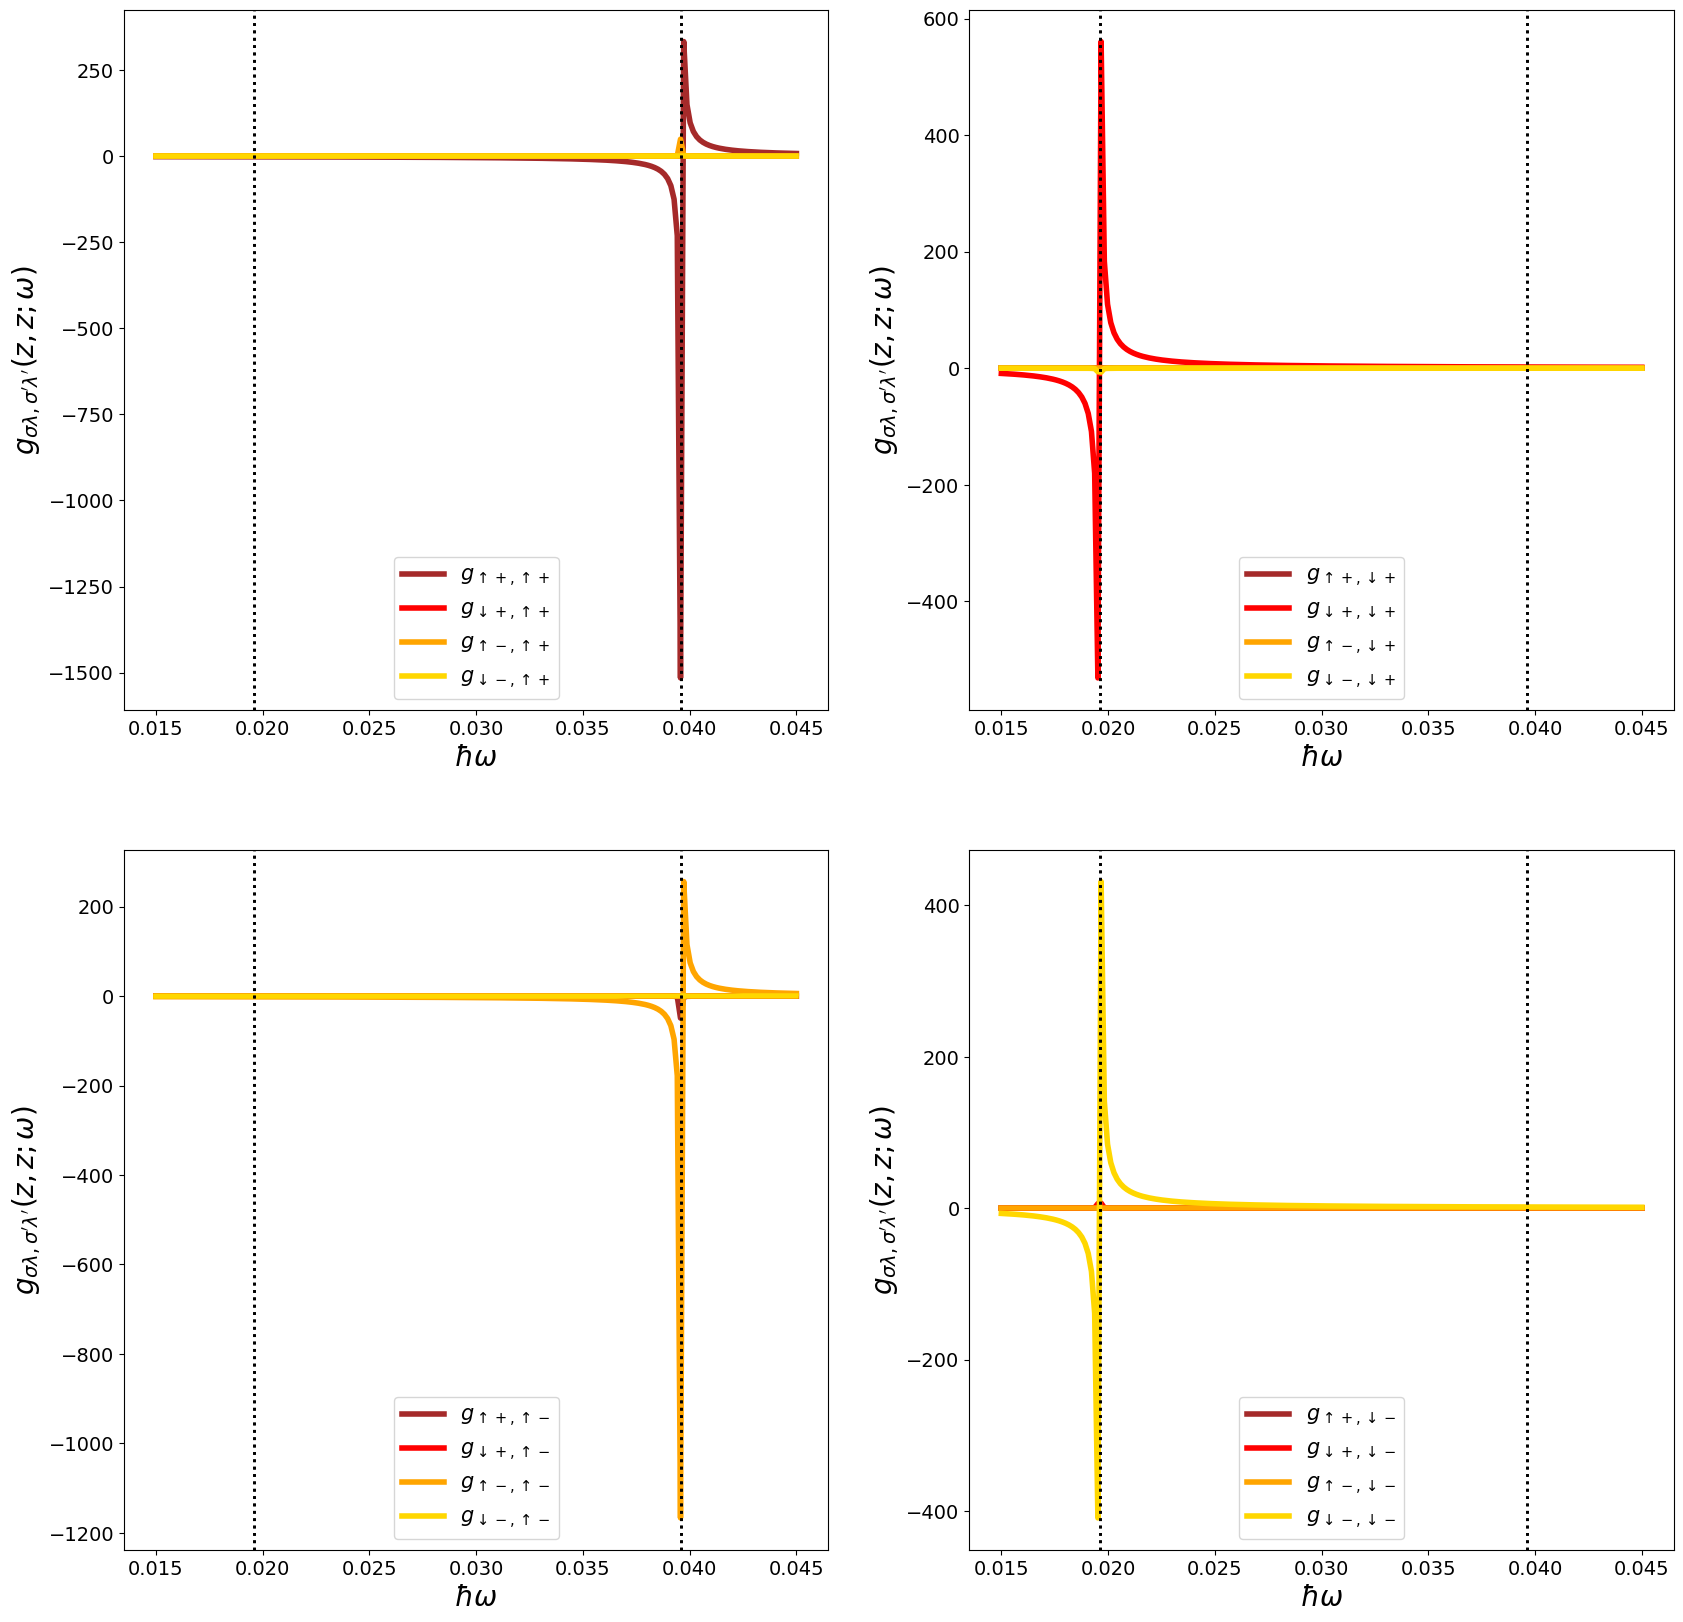

In [13]:
# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# labels for curves
labels = [["$g_{\\uparrow +, \\uparrow +}$", "$g_{\\uparrow +, \downarrow +}$", "$g_{\\uparrow +, \\uparrow -}$", "$g_{\\uparrow +, \downarrow -}$"],
          ["$g_{\downarrow +, \\uparrow +}$", "$g_{\downarrow +, \downarrow +}$", "$g_{\downarrow +, \\uparrow -}$", "$g_{\downarrow +, \downarrow -}$"],
          ["$g_{\\uparrow -, \\uparrow +}$", "$g_{\\uparrow -, \downarrow +}$", "$g_{\\uparrow -, \\uparrow -}$", "$g_{\\uparrow -, \downarrow -}$"],
          ["$g_{\downarrow -, \\uparrow +}$", "$g_{\downarrow -, \downarrow +}$", "$g_{\downarrow -, \\uparrow -}$", "$g_{\downarrow -, \downarrow -}$"]]



# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # plot the Green's function
        axs[iPic][jPic].plot(energies, [gf_omega[idx][irow][icol].real for idx in range(len(energies))], c=colors[irow], lw=4, label=labels[irow][icol])

    for e in egval[:4]:
        axs[iPic][jPic].axvline(x=e, color='black', lw=2, ls=':')

    #axs[iPic][jPic].set_ylim(-0.1,0.1)
    
    axs[iPic][jPic].set_xlabel("$\hbar \omega$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

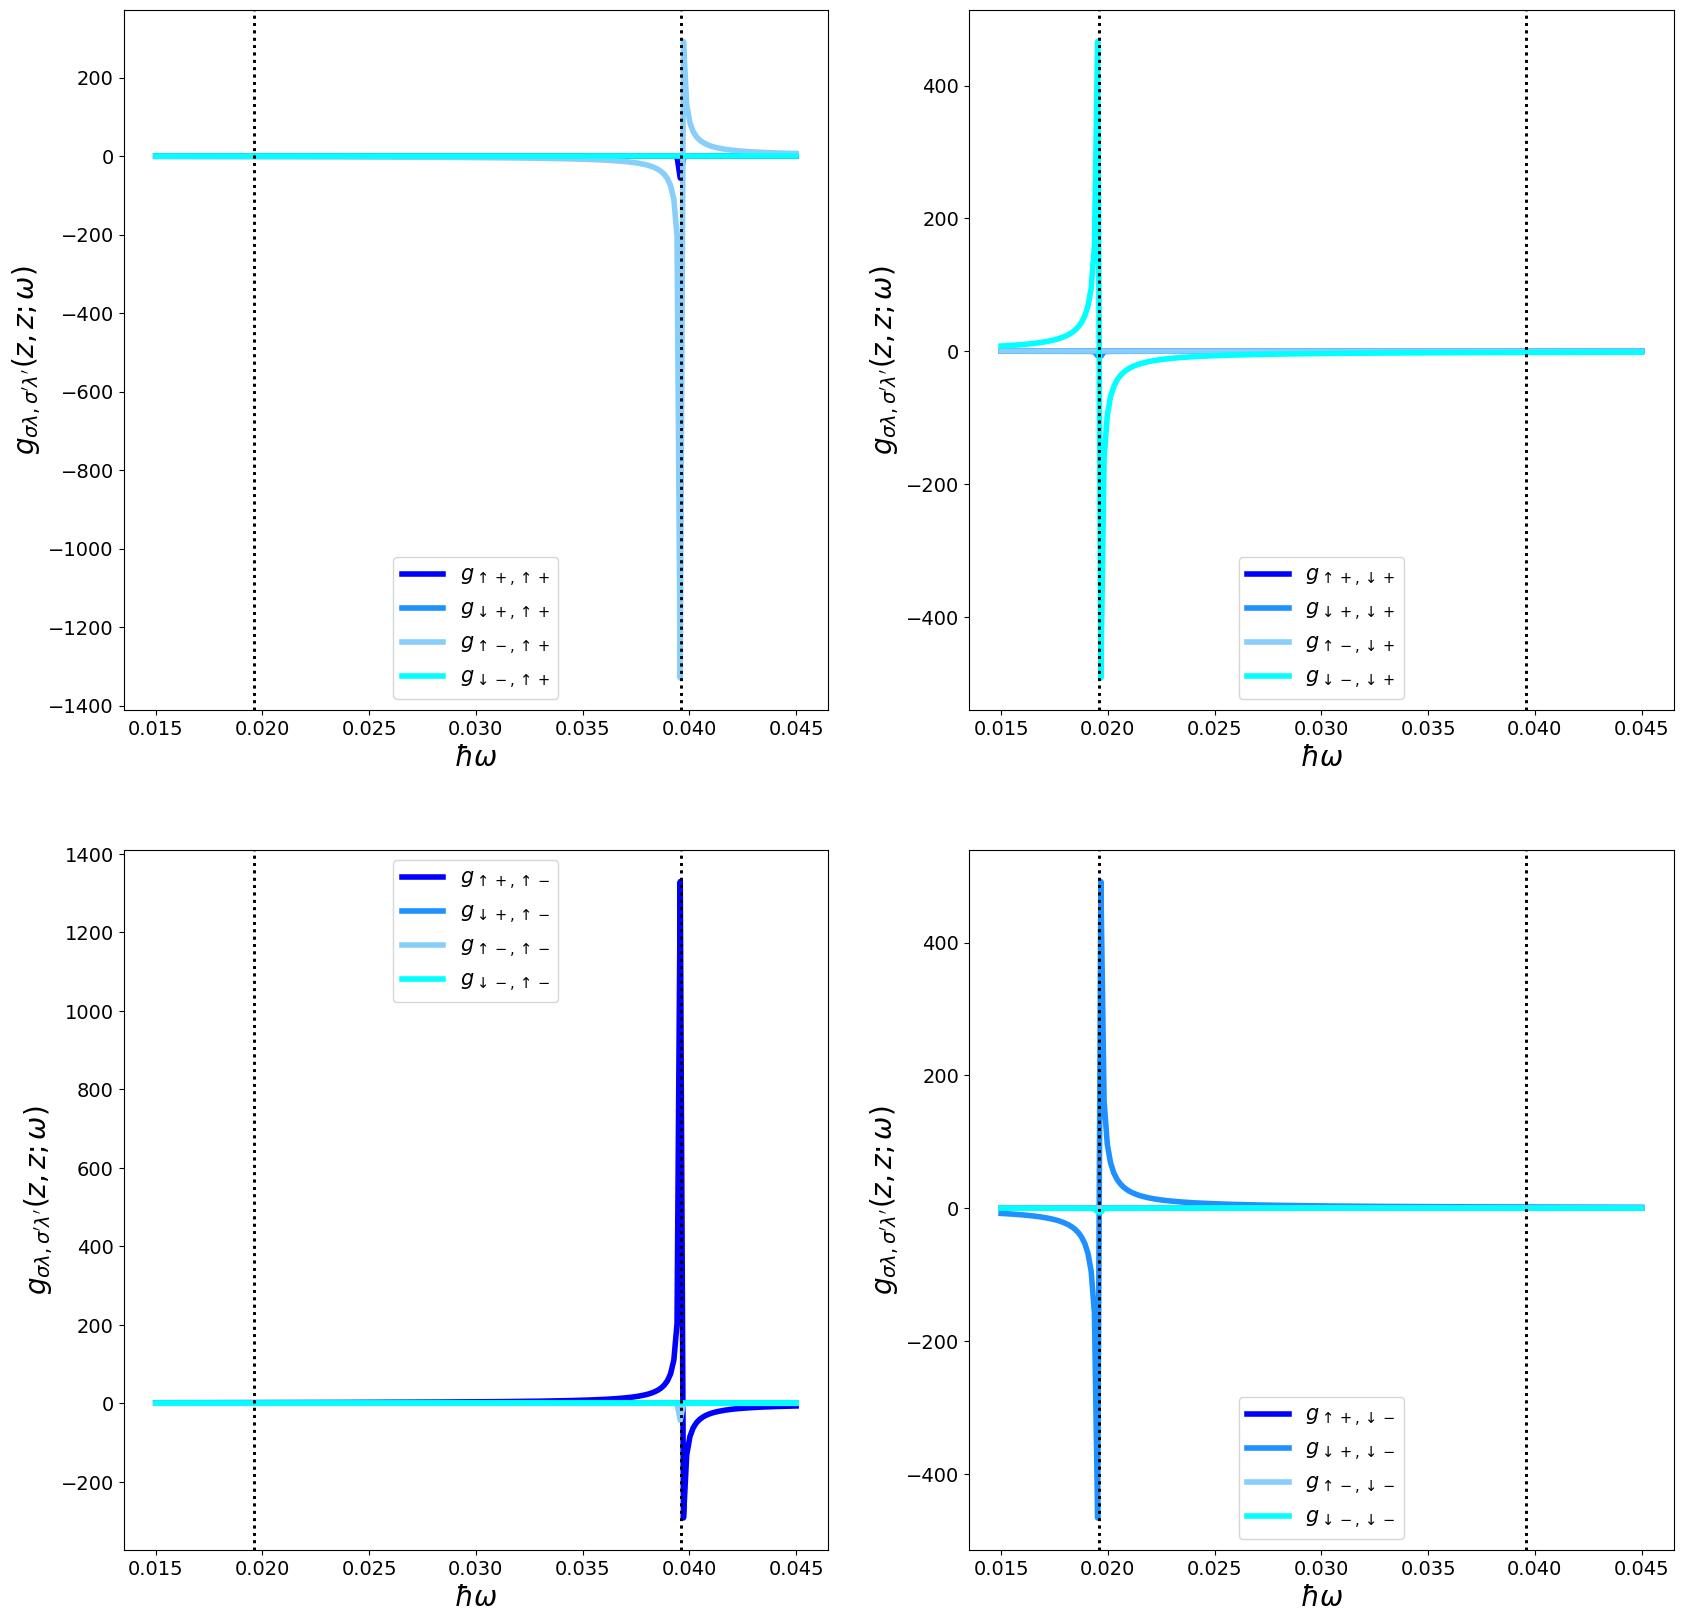

In [14]:
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']

# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        
        # plot the Green's function
        axs[iPic][jPic].plot(energies, [gf_omega[idx][irow][icol].imag for idx in range(len(energies))], c=colors[irow], lw=4, label=labels[irow][icol])


    for e in egval[:4]:
        axs[iPic][jPic].axvline(x=e, color='black', lw=2, ls=':')
        
    #axs[iPic][jPic].set_ylim(-1,1)
    
    axs[iPic][jPic].set_xlabel("$\hbar \omega$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

### <font> Space Dependence </font> 

In [23]:
from GreenFunctions_MTI import GMTI_analytical, GMTI_normalBC

# parameters
kx = 0.; ky = 0.; L = 0.; omega = 0.0025
# lattice
Nlat = 250; d = 100.; dZ = d/(Nlat-1)
# eigenstates
lattice, egval, spinors = eigenstates(Nlat=Nlat, dZ=dZ, kx=kx, ky=ky, L=L)


# compute exact Green's function on the lattice
gf_diff_eq = np.array([GMTI_normalBC(d=d, z=z, Z=z, kx=kx, ky=ky, L=L, w=omega) for z in lattice])
# compute approximate Green's function
gf_space = np.array([ GMTI_discretized(Nstates=250, egval=egval, spinors=spinors, z=z, Z=z, w=omega,  eta=1E-10) for z in range(Nlat)])

1000 (1000, 1000)


#### <font color='green'> **Real Part** </font> 


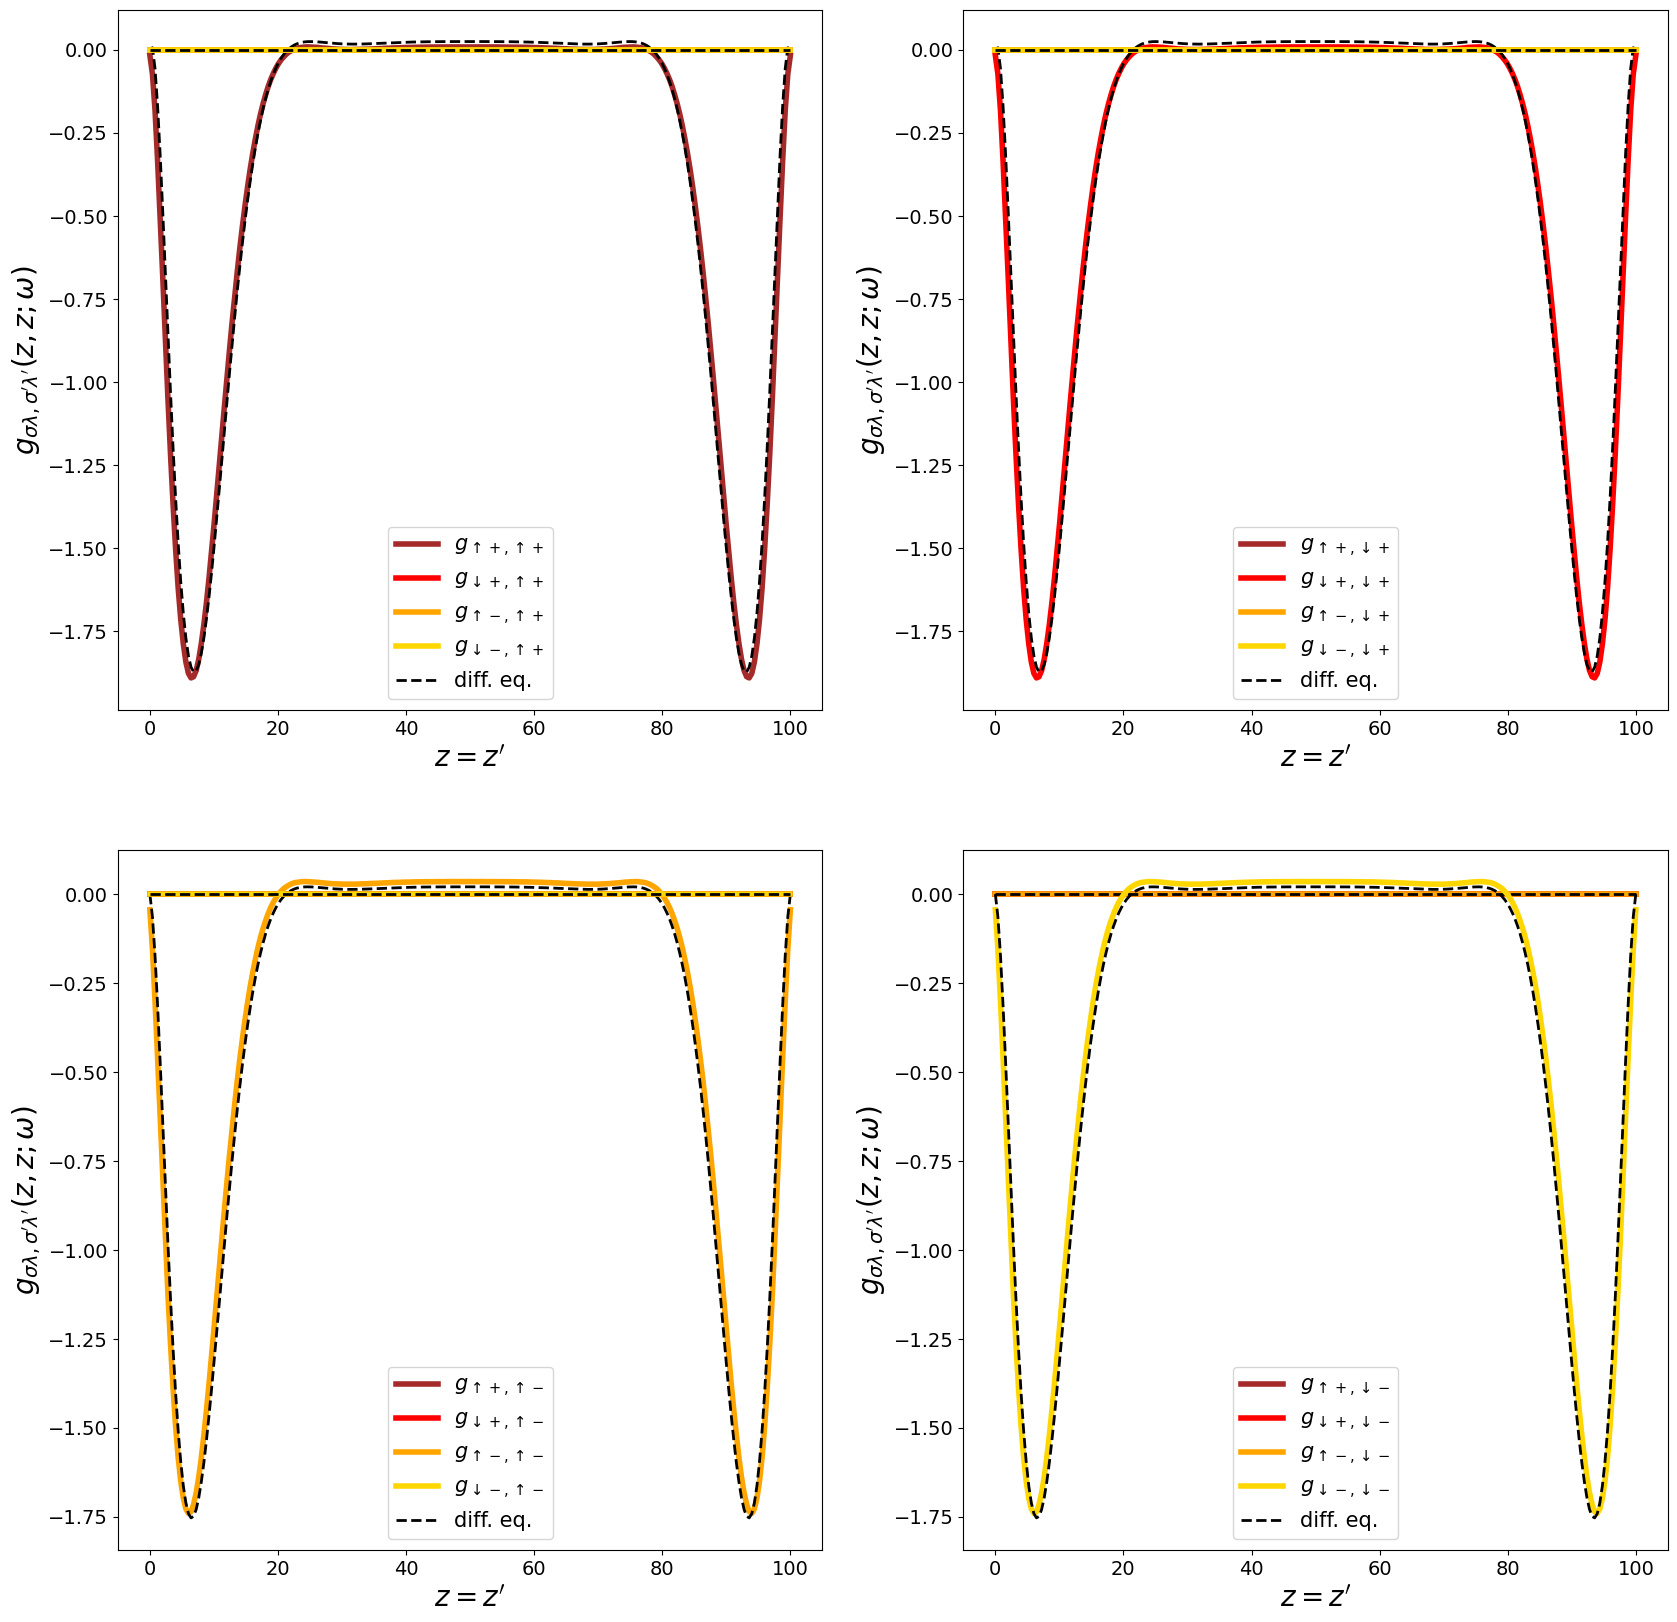

In [24]:
# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot approximate results
        axs[iPic][jPic].plot(lattice, [gf_space[idx][irow][icol].real for idx in range(Nlat)], c=colors[irow], lw=4, label=labels[irow][icol] )
        
        # plot exact results
        if irow == 3:
            axs[iPic][jPic].plot(lattice, [gf_diff_eq[idx][irow][icol].real for idx in range(Nlat)], '--', c='black', lw=2, label='diff. eq.')
        else:
            axs[iPic][jPic].plot(lattice, [gf_diff_eq[idx][irow][icol].real for idx in range(Nlat)], '--', c='black', lw=2)
    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 


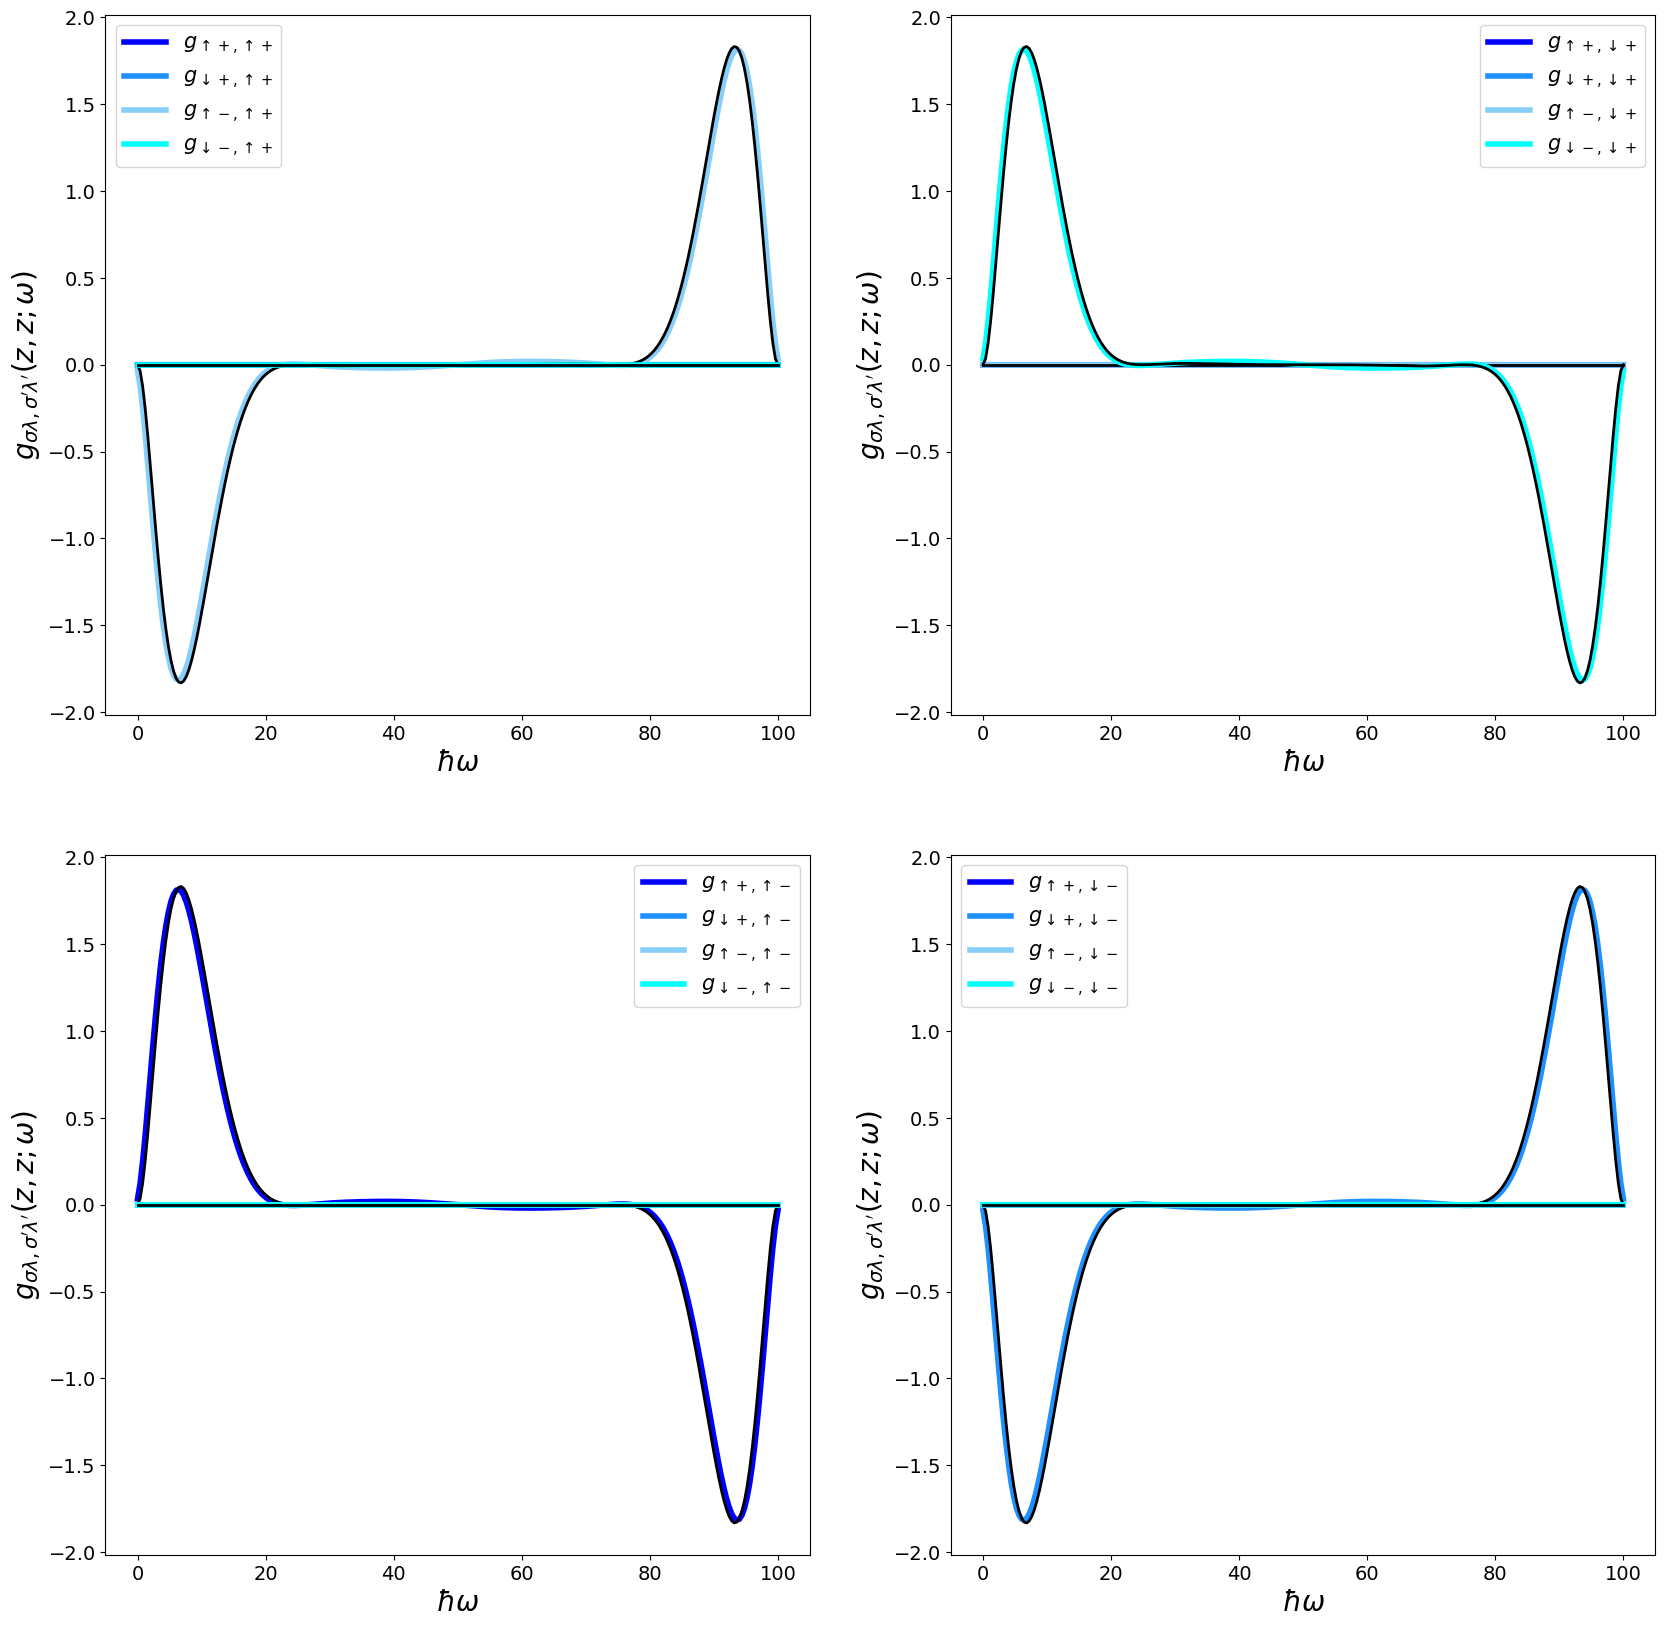

In [17]:
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # plot the Green's function (from discretization)
        axs[iPic][jPic].plot(Z, [gf_space[idx][irow][icol].imag for idx in range(len(Z))], c=colors[irow], lw=4, label=labels[irow][icol])
        
        # plot the Green's function (from differential equation)
        axs[iPic][jPic].plot(Z, [gf_normalBC[idx][irow][icol].imag for idx in range(len(Z))], c='black', lw=2)

    #axs[iPic][jPic].set_ylim(-0.1,0.1)
    
    axs[iPic][jPic].set_xlabel("$\hbar \omega$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='red'> **Cross-check** </font> 

We plot here the Green's function $\mathcal{G}^{(0)}(z,z;\omega)$ for the diagonal case $k_x=k_y=0$ and compare with the analytical situation.


In [25]:
from GreenFunctions_MTI import GMTI_diagonal

# parameters
kx = 0.; ky = 0.; L = 0.; w=0.01
# lattice
Nlat = 250; d = 100.; dZ = d/(Nlat-1)
# eigenstates
lattice, egval, spinors = eigenstates(Nlat=Nlat, dZ=dZ, kx=kx, ky=ky, L=L,  A1=0., A2=0.)


# number of states for loop
Nstates = [50,100,250,500]

# array for Green's function
gf = []
# loop over increasing subset of states
for idx in range(len(Nstates)):
    
    # compute approximate Green's function with all states
    gf.append( np.array([GMTI_discretized(Nstates[idx], egval, spinors, z=z, Z=z, w=w, eta=1E-16) for z in range(Nlat)]) )
    # print for each susbset
    print('Sum over ' + str(Nstates[idx]) + ' states')


# analytical solution for diagonal Hamiltonian
gfdiagonal = np.array([GMTI_diagonal(d=d, z=z, Z=z, kx=kx, ky=ky, L=L, w=w) for z in lattice])

1000 (1000, 1000)
Sum over 50 states
Sum over 100 states
Sum over 250 states
Sum over 500 states


#### <font color='green'> **Real Part** </font> 

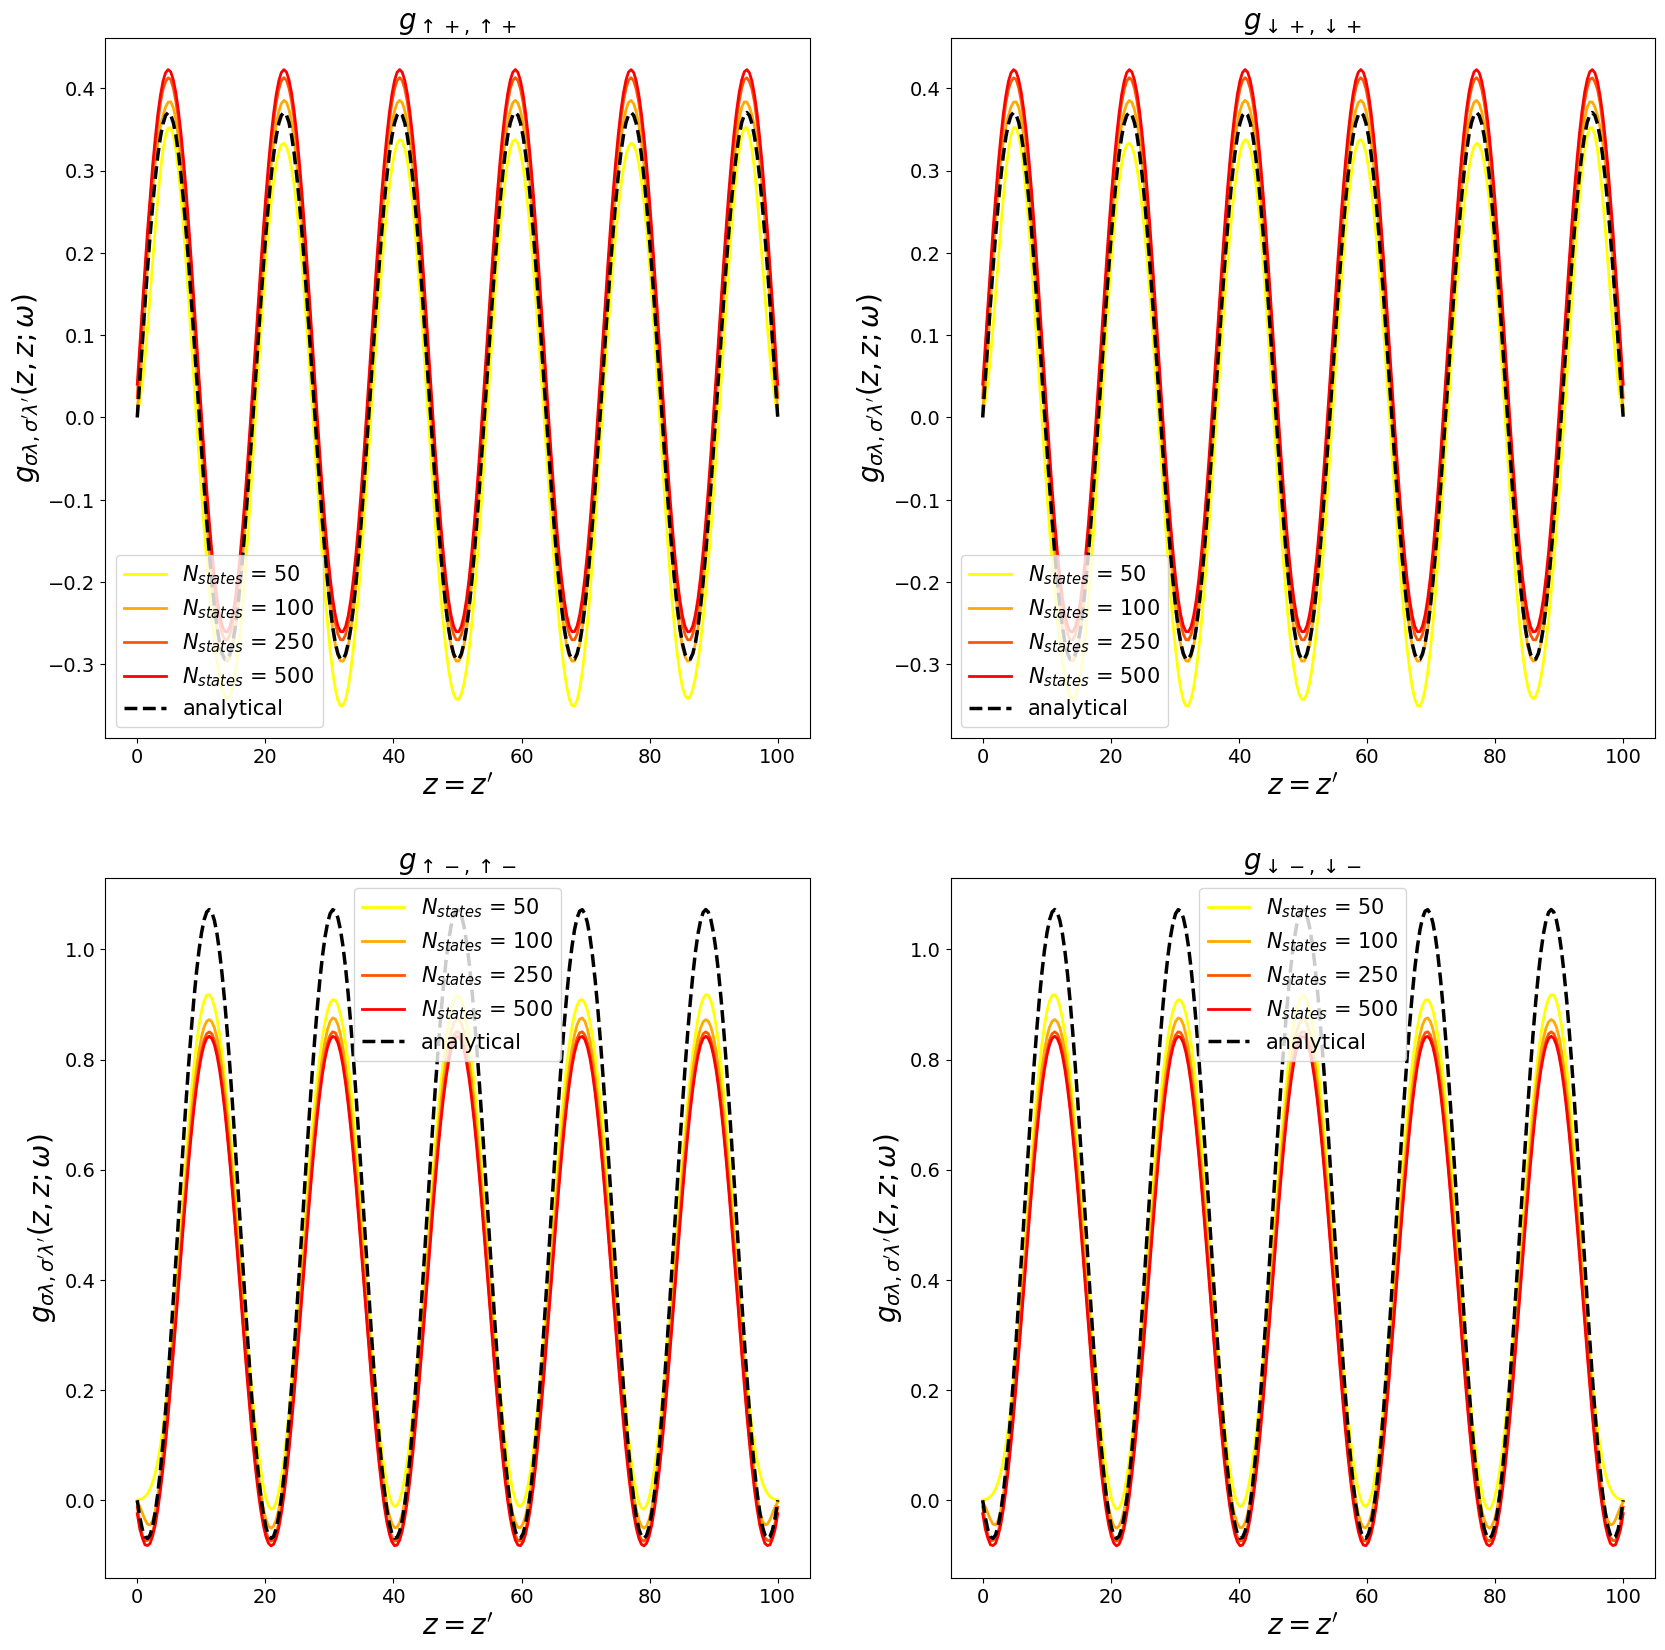

In [26]:
# colors gradient
cmap = plt.get_cmap('autumn_r', len(Nstates))

# titles for subplots
title = ["$g_{\\uparrow +, \\uparrow +}$", "$g_{\downarrow +, \downarrow +}$", "$g_{\\uparrow -, \\uparrow -}$", "$g_{\downarrow -, \downarrow -}$"]


# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to diagonal components
for icomp in range(4):
        
    # indices for plotting
    if icomp==0: iPic = 0; jPic = 0
    if icomp==1: iPic = 0; jPic = 1
    if icomp==2: iPic = 1; jPic = 0
    if icomp==3: iPic = 1; jPic = 1
    
    for iegv in range(len(Nstates)):

        # plot approximate results
        axs[iPic][jPic].plot(lattice, [gf[iegv][iz][icomp][icomp].real for iz in range(Nlat)], c=cmap(iegv), lw=2, label='$N_{states}$ = ' + str(Nstates[iegv]) )

    # Green's function from trivial solution
    axs[iPic][jPic].plot(lattice, gfdiagonal[:,icomp].real, '--', c='black', lw=2.5, label='analytical');

    axs[iPic][jPic].set_title(title[icomp], fontsize = 20)

    #axs[iPic][jPic].set_ylim(-0.5,0.5)
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

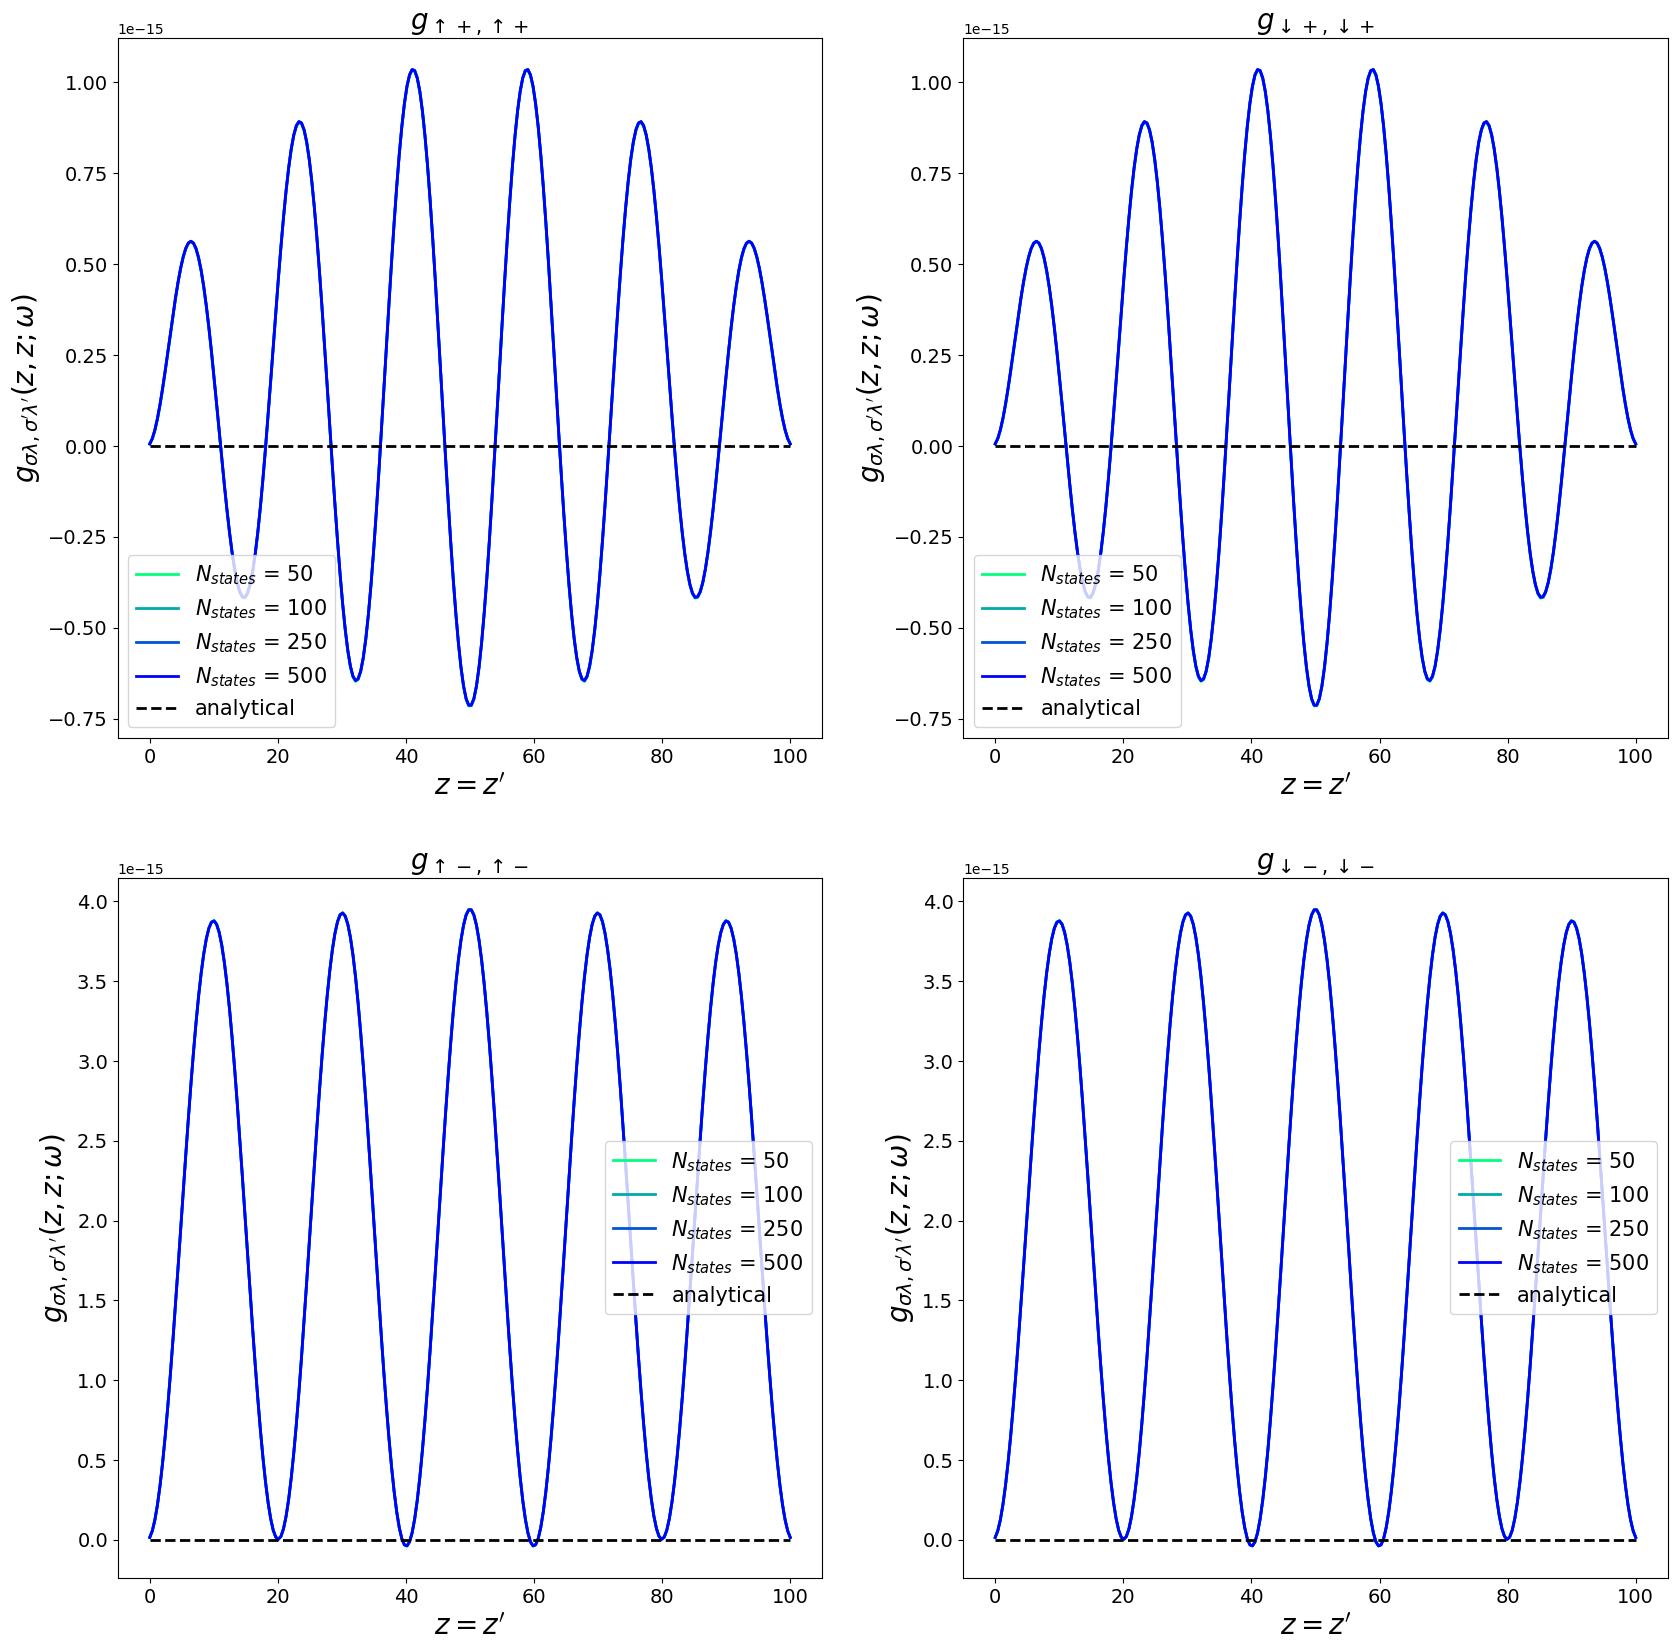

In [27]:
# colors gradient
cmap = plt.get_cmap('winter_r', len(Nstates))

# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to diagonal components
for icomp in range(4):
        
    # indices for plotting
    if icomp==0: iPic = 0; jPic = 0
    if icomp==1: iPic = 0; jPic = 1
    if icomp==2: iPic = 1; jPic = 0
    if icomp==3: iPic = 1; jPic = 1
    
    for iegv in range(len(Nstates)):

        # plot approximate results
        axs[iPic][jPic].plot(lattice, [gf[iegv][iz][icomp][icomp].imag for iz in range(Nlat)], c=cmap(iegv), lw=2, label='$N_{states}$ = ' + str(Nstates[iegv]) )

    # Green's function from trivial solution
    axs[iPic][jPic].plot(lattice, gfdiagonal[:,icomp].imag, '--', c='black', lw=2, label='analytical');

    axs[iPic][jPic].set_title(title[icomp], fontsize = 20)

    #axs[iPic][jPic].set_ylim(-0.5,0.5)
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);